## 5.3 레버리지와 아웃라이어

지금까지는 각각의 features가 의미가 있는지 없는지를 t-test등을 통해 살펴봤음. <br>
이번에는 각각의 데이터 row 하나하나별로 이 데이터가 의미를 많이 갖는지 적게 갖는지를 살펴보자. <br>
데이터 별 분석이 바로 ***레버리지 분석***과 ***아웃라이어 분석***

### 레버리지

![1_26.jpeg](./materials/1_26.jpeg)

완벽한 값이 나온다면, H는 그냥 X, Y로 계산이 되잖아. 

개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향력은 레버리지 분석이나 아웃라이어 분석을 통해 알 수 있다.

**레버리지(leverage)**는 실제 종속변수값 $y$가 예측치(predicted target) $\hat{y}$에 미치는 영향을 나타낸 값이다. self-influence, self-sensitivity 라고도 한다.

가중치 벡터의 결과값을 예측식에 대입하여 $y$ 와 $\hat{y}$의 관계를 다음과 같다는 것을 보였었다.

$$  \hat{y} =  Hy $$

이 행렬 $H$를 **영향도 행렬**(influence matrix) 또는 **hat 행렬**(hat matrix)이라고 한다고 하였다.

행렬 $H$의 $i$번째 행, $j$번째 열 성분을 $h_{ij}$라고 하면 실제 결과값 $y_i$과 예측값 $\hat{y}_i$은 다음과 같은 관계를 가진다.

$$
\hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N 
$$

레버리지는 수학적으로 **영향도 행렬의 대각성분 $h_{ii}$**으로 정의된다. 즉, 레버리지는 실제의 결과값 $y_i$이 예측값 $\hat{y}_i$에 미치는 영향, 즉 예측점을 자기 자신의 위치로 끌어 당기는 정도를 나타낸 것이다. 

만약  $h_{ii}$ 값이 1이 되고 나머지 성분들이 모두 0이 될 수만 있다면 모든 표본 데이터에 대해 실제 결과값과 예측값이 일치하게 될 것이다.

$$ h_{ii} = 1, h_{ij} = 0 \; (\text{for } i \neq j) \;\; \rightarrow \;\; \hat{y}_i = y_i $$

하지만 ***곧 알 수 있듯이 이러한 일은 발생하지 않는다.***
레버리지값은 다음과 같은 특성을 가진다는 것을 수학적으로 증명할 수 있다.

1. 1보다 같거나 작은 양수 혹은 0이다.

    $$  0 \leq h_{ii} \leq 1 $$
    
2. 레버리지의 합은 모형에 사용된 모수의 갯수(우리가 모은 데이터의 종류의 갯수) $K$와 같다. 모수에는 상수항도 포함되므로 상수항이 있는 1차원 모형에서는 $K = 2$가 된다.

    $$  \text{tr}(H) = \sum_i^N h_{ii} = K $$

이 두가지 성질로부터 레버리지 값은 $N$개의 데이터에 대한 레버리지값은 양수이고 그 합이 $K$가 된다는 것을 알 수 있다. 즉 $K$라고 하는 값을 $N$개의 변수가 나누어 가지는 것과 같다. 현실적으로 데이터의 갯수 $N$는 모수의 갯수 $K$보다 훨씬 많기 때문에 위에서 말한 특성을 적용하면 모든 레버리지 값이 동시에 1이 되는 것은  불가능하다.<br>
즉 이게 무슨말이냐면, $K$라는 값을 $N$개의 $H$들이 나눠가져야 한다는 것. <br>
$H$는 $N$개. $K$는 상수항 포함 feature 수<br>
보스턴집값 데이터셋이면, 500개가 14를 나눠가지는 꼴이야. 그럼 모두 1일 수가 없잖아. <br>

위 식을 이용하면 레버리지의 평균값도 구할 수 있다. 그냥 K를 N개가 나눠먹었으니깐, 평균이 대충 이렇게 나온다는 거지. 

$$ h_{ii} \approx \dfrac{K}{N} $$

보통 이 평균값의 2 ~ 4배보다 레버리지 값이 크면 레버리지가 크다고 이야기한다.

이 평균값의 2~4배 보다(rule of thumb) 크게 나오는 애들을, 레버리지 큰 애들이라고 말한다.

### statsmodels를 이용한 레버리지 계산

레버리지 값은 `RegressionResults` 클래스의 `get_influence` 메서드로 다음과 같이 구할 수 있다. 우선 다음과 같은 가상의 1차 데이터로 회귀분석 예제를 풀어보자.

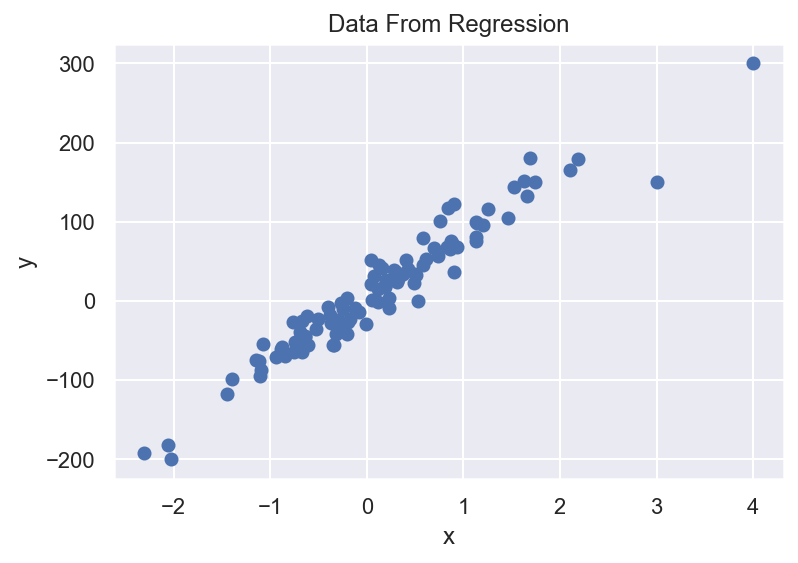

In [103]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
# 99까지 만들고, 100번과 101번 데이터는 수동으로 집어넣음. 
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data From Regression")
plt.show()

이 데이터를 이용하여 선형회귀를 한 결과는 다음과 같다.

In [94]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.61e-61
Time:                        01:42:25   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

선형회귀 결과에서 `get_influence` 메서드를 호출하면 영향도 정보 객체를 구할 수 있다. 이 객체는 `hat_matrix_diag` 속성으로 레버리지 벡터의 값을 가지고 있다.  

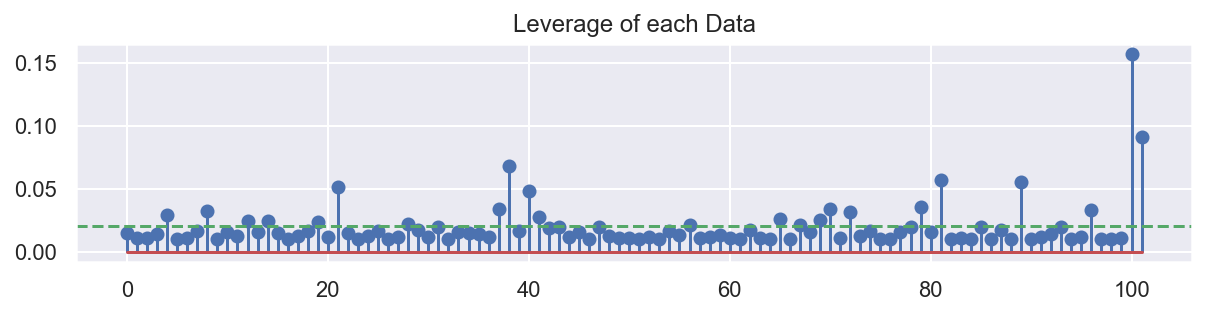

In [95]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
# 0.02값을 그냥 녹색으로 그려 넣은 것. 2/102니깐 평균. 
plt.axhline(0.02, c="g", ls="--")
plt.title("Leverage of each Data")
plt.show()

수동으로 추가한 마지막 두 개의 데이터를 제외하면 대부분의 데이터는 레버리지 값이 0.02 근처의 낮은 값을 가진다. 

$$ \text{레버리지 평균} \approx \dfrac{2}{102} \approx 0.02 $$

레버리지의 합이 2와 같아진다는 것도 다음과 같이 확인할 수 있다.

In [4]:
hat.sum()

2.0000000000000004

위 결과를 이용하여 레버리지가 큰 데이터만 표시하면 아래와 같다. 여기에서는 레버리지 값이 0.05를 넘는 데이터만 큰 원으로 표시하였다.

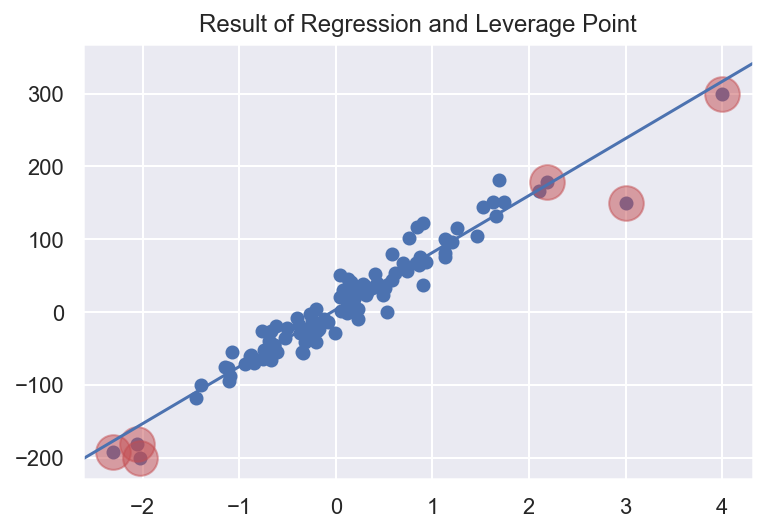

In [97]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("Result of Regression and Leverage Point")
plt.show()

***위 그림에서 데이터가 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐을 알 수 있다.*** <br>
즉, 분포에서 떨어져 있는 애들이 레버리지가 크다. <br>
다시 말하면, 데이터의 영향력이 크다. <br>
$X$를 평수라고 생각해보자. $Y$가 집값이야. <br>
우리 동네 집들을 조사해보니깐, 2-30평대 집들은 엄청 많아. <br>
그러면, 그 2~30평대 중에 뭐 좀 이상하더라도, 전체 분석에 영향이 별로 없을 것 같아. <br>
근데 9평, 5-60평 100평대는 몇개 있지도 않은데, 이상하면?<br>
즉, 100평대 집은, 그냥 왼쪽 위 꼬다리에 있는 애가 지배하는거야. 이 집값이 오르면, 100평대 집이 오른거야 그냥<br>
100평대 집이 이 집 밖에 없으니깐. <br>
즉, 데이터가 별로 없는 구간에서는 소수가 이 구간을 대표하기 때문에 얘네들이 레버리지가 높게 나온다.<br><br>


***즉, 해당 X근처에서 대표성이 큰 애들이 레버리지가 커진다는 결론***

### 레버리지의 영향

**결론적으로 레버리지가 큰 데이터는 빼냐 넣냐가 중요하다는 것.** 이거 알고 가면 된다. <br>
빼거나 넣을 때 마다 영향이 커서, 함부로 넣고 빼고 할 수가 없다는 것. 

레버리지가 큰 데이터가 모형에 주는 영향을 보기 위해 이 데이터가 포함된 경우의 모형과 포함되지 않은 경우의 모형을 아래에 비교하였다. 레버리지가 큰 데이터는 포함되거나 포함되지 않는가에 따라 모형에 주는 영향이 큰 것을 알 수 있다.

***전체 100개 데이터 중에 1개를 넣었다 뺏다 하는데, 선이 달라져버린다***<br>


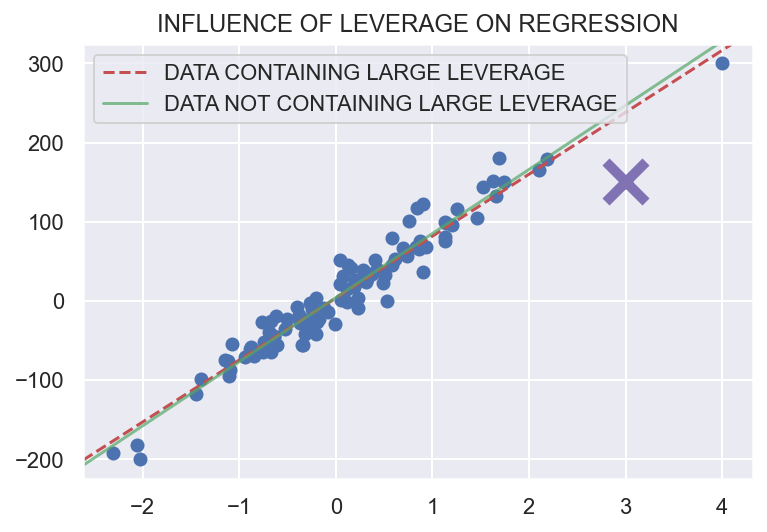

In [99]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"DATA CONTAINING LARGE LEVERAGE", u"DATA NOT CONTAINING LARGE LEVERAGE"],
           loc="upper left")
plt.title("INFLUENCE OF LEVERAGE ON REGRESSION")
plt.show()

반대로 레버리지가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는 것을 알 수 있다.

우리 지어 있는 데이터중에 하나 넣었다 뺏다 한건데, <br>
넣나 빼나 선이 똑같다. 

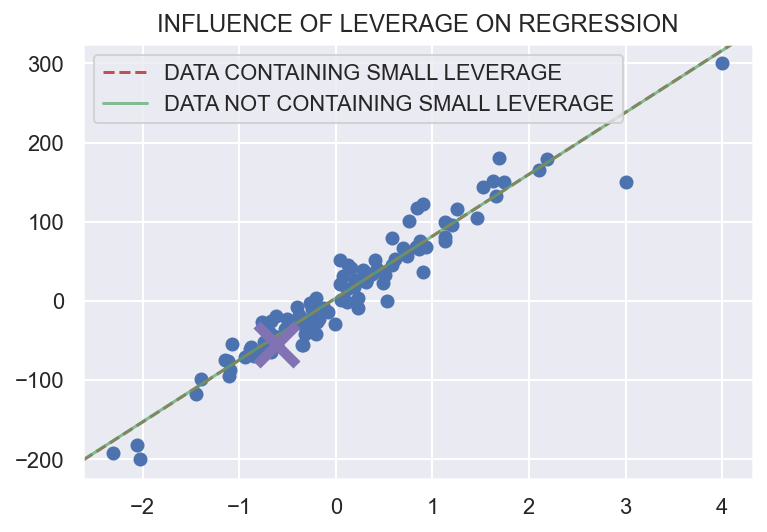

In [100]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"DATA CONTAINING SMALL LEVERAGE", u"DATA NOT CONTAINING SMALL LEVERAGE"],
           loc="upper left")
plt.title("INFLUENCE OF LEVERAGE ON REGRESSION")
plt.show()

혹은 레버리지가 크더라도 오차가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는다.

***레버리지가 크더라도, 잔차가 작으면 빼도 영향이 별로 없다.***

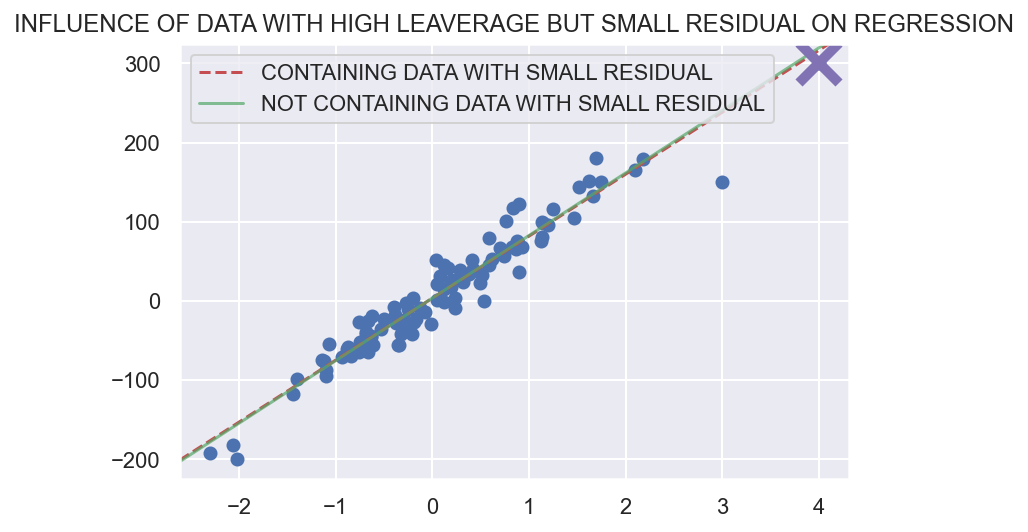

In [102]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"CONTAINING DATA WITH SMALL RESIDUAL", u"NOT CONTAINING DATA WITH SMALL RESIDUAL"],
           loc="upper left")
plt.title("INFLUENCE OF DATA WITH HIGH LEAVERAGE BUT SMALL RESIDUAL ON REGRESSION")
plt.show()

***즉, 레버리지가 크더라도, 다른 데이터들이 따르는 규칙을 잘 따르고 있으면, 넣고 빼고가 크게 의미있진 않다.***<br>


결론: 
***데이터 넣고 빼고 할때, 레버리지와 오차값이 둘다 큰 애들을 조심하자!!!***

### 아웃라이어

아웃라이어란, 다른 애들이 따르고 있는 데이터 법칙을 혼자 따르지 않고 있는 애들 <br>
순치적으로는 **잔차의 크기가 큰 애들**, 그런데 그냥 잔차의 크기로 비교하면 안된다. <br>

모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터, 즉 잔차가 큰 데이터를 **아웃라이어(outlier)**라고 한다.
그런데 잔차의 크기는 독립 변수의 영향을 받으므로 아웃라이어를 찾으러면 이 영향을 제거한 표준화된 잔차를 계산해야 한다.

### 표준화 잔차

개별적인 잔차의 표준편차를 구하면 다음과 같다.

$$ e = (I - H) \epsilon = M \epsilon $$

$$
\begin{eqnarray}
\text{Cov}[e] 
&=& \text{E}[M \epsilon\epsilon^T M^T] \\
&=& M \text{E}[\epsilon\epsilon^T] M^T \\
&=& M \sigma^2 I M^T \\
&=& \sigma^2MM^T \\
&=& \sigma^2MM \\
&=& \sigma^2M \\
&=& \sigma^2(I - H) \\
\end{eqnarray}
$$

위 식에서는 $M$이 대칭 행렬이고 $M^2=M$라는 사실을 이용하었다.

대각 성분만 보면 개별적인 잔차의 표준편차는 다음과 같다.<br>
즉, 잔차의 분산은 disturbance의 분산 곱하기 (1-레버리지)가 된다는 것.<br>
이게 무슨말이냐면, ***레버리지가 작은 애들은 잔차가 커진다는 것.***<br>
우리의 가정에 따르면, disturbance의 분산은 다 똑같아. 그런데, 잔차의 분산은 데이터마다 달라질 수 있다는 것. <br>
레버리지가 큰 애들은, 잔차의 분산이 작게 나오고, 레버리지가 작은 애들은 잔차의 분산이 크게 나온다는 것. 


$$ \text{Var}[e_i] = \sigma^2 (1 - h_{ii}) $$ 

즉, 오차의 표준 편차는 모든 표본에 대해 같지만 개별적인 잔차의 표준편차는 레버리지에 따라 달라지는 것을 알 수 있다. 

오차의 분산은 알지 못하므로 잔차 분산으로부터 추정한다.

$$ \text{Var}[e_i] \approx s^2 (1 - h_{ii}) $$ 

이 식에서 $s$는 다음과 같이 구한 오차의 표준편차 추정값이다.

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 가지도록 스케일링한 것을 **표준화 잔차**(standardized residual 또는 normalized residual 또는 studentized residual)라고 한다. <br> 
각 잔차마다 표준편차/분산이 다 다르니깐, 모든 분포 각자의 표준편차로 나눠서, 분산/표준편차를 1로 만들어 준다. 잔차의 기댓값은 0인 상태(앞에서 유도했음). 잔차 분포 자체가 정규분포니깐, 기댓값 0 빼고 각자의 표준편차로 나눈거니깐, 다같이 표준정규분포가 된 상태.

$$ r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} $$


즉, 잔차는 서로 바로 비교하면 안된다. 각각 서로 다른 표준편차로 나눠서 standardized 시켜준 다음에 비교해야 한다. <br>
그러니깐, 이게 무슨 말이냐면, 잔차가 크다 작다 할때 각자 크기 보면서 비교하면 안된다는 거야. <br>
서로 기댓값만 똑같고 레버리지에 따라 서로 분산이 다른 분포에서 나온거잖아. <br>
***서로 같은 조건으로 맞춰주고 비교하는게 공정하다는 거야***

<pre>
from Blog

표준화 잔차는 원시 잔차가 특이치를 잘 나타내지 않을 수 있기 때문에 유용합니다. 각 원시 잔차의 분산은 연결된 x-값에 따라 다를 수 있습니다. 이렇게 서로 다른 척도로 인해 원시 잔차의 크기를 평가하기는 어렵습니다. 서로 다른 분산을 공통 척도로 변환하여 잔차를 표준화하면 이런 문제가 해결됩니다.

</pre>

### statsmodels를 이용한 표준화 잔차 계산

아래에서는 각 데이터의 잔차를 표시하였다. 잔차는 `RegressionResult` 객체의 `resid` 속성에 있다.

근데 이걸 비교하면 안된다고. 표준화해서 비교해야 된다고

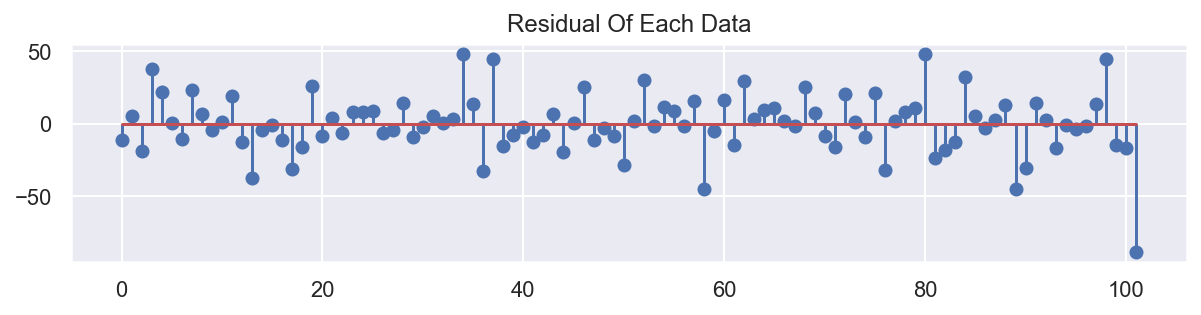

In [104]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("Residual Of Each Data")
plt.show()

표준화 잔차는 `resid_pearson` 속성에 있다. 보통 표준화 잔차가 2~4보다 크면 아웃라이어로 본다.

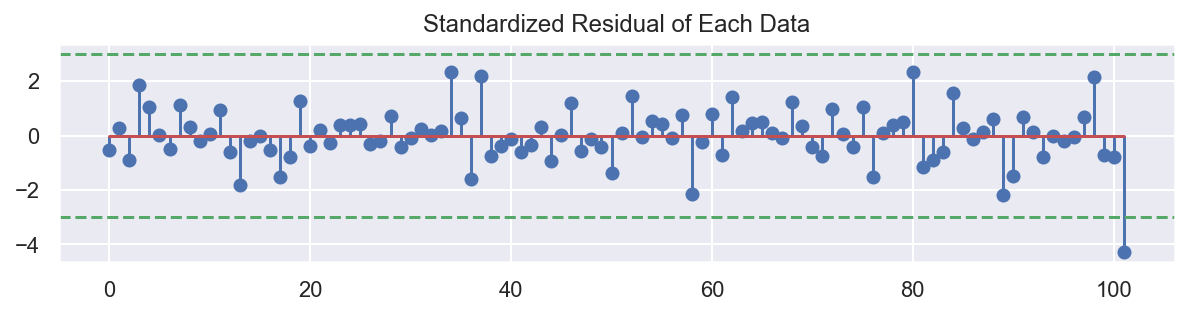

In [105]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Standardized Residual of Each Data")
plt.show()

여기서 잔차 큰 애, 당연하지만, 레버리지 큰 놈이였던 것. 멀리 떨어져있던 놈. 

이 상태로 만들어놓고 잔차가 크다 작다 해야되는 것. 

결론적으로 표준화잔차가 -2 - 2 정도 보다 커지면 아웃라이어라고 말한다. <br>
아웃라이어는 사실 왜 아웃라이어가 됬는지 하나하나 찾아봐야돼. 방법이 없다. <br>
진짜 잘못된거면 빼야되는데, 레버리지가 큰 애면 심각하게 고민해봐야돼. <br>
레버리지 큰 애 빼버리면, 모델이 확 달라질거야. <br>

<br>

**즉 우리는, residual이 큰지 아닌지 & leverage가 큰지 아닌지를 동시에 봐야 한다.**

그걸 동시에 보는 기준이 바로 아래의, **"Cook's Distance"**

### Cook's Distance

간단하게 말하면, 표준화잔차와 레버리지를 곱한 것. <br>
즉, Cook's Distance가 크다는 것은 Standardized Residual이 크거나 혹은 Leverage가 큰 것. 

회귀 분석에는 잔차의 크기가 큰 데이터가 아웃라이어가 되는데 이 중에서도 주로 관심을 가지는 것은 레버리지와 잔차의 크기가 모두 큰 데이터들이다. 잔차와 레버리지를 동시에 보기위한 기준으로는 Cook's Distance가 있다.  다음과 같이 정의되는 값으로 레버리지가 커지거나 잔차의 크기가 커지면 Cook's Distance 값이 커진다.

$$ D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$

Fox' Outlier Recommendation(Rule Of Thumb) 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단하자는 것이다.

$$ D_i > \dfrac{4}{N − K - 1} $$

모든 데이터의 레버리지와 잔차를 동시에 보려면 `plot_leverage_resid2` 명령을 사용한다. 이 명령은 x축으로 표준화 잔차의 제곱을 표시하고 y축으로 레버리지값을 표시한다. 데이터 아이디가 표시된 데이터들이 레버리지가 큰 아웃라이어이다.

하단 명령어는 Fox' Outlier Recommendation를 쉽게 볼 수 있도록 시각화 해준 것.<br>
Leverage와 Normalized Residual에 제곱한 값을 표시를 해 놓은 것. <br>
Y쪽으로 클수록, 레버리지가 큰 애고, 오른쪽으로 많이 가 있을 수록 표준화 잔차가 큰 것. <br>
바깥에 있는 애들을 주의깊게 보라고, 번호까지 써준다. <br>
해당 row를 잘 보라는 거야. 

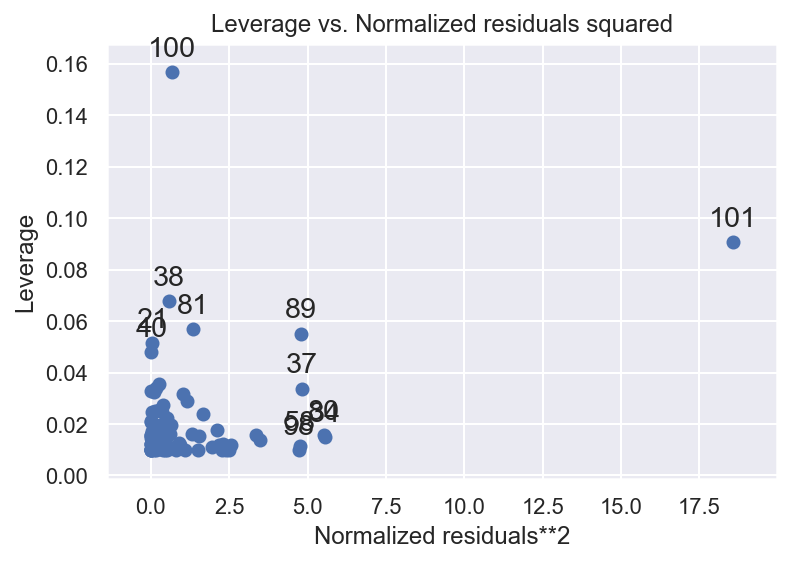

In [12]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

`influence_plot` 명령을 사용하면 Cook's distance를 버블 크기로 표시한다.<br>
이 명령어는 위랑 기능은 똑같은데, Cook's Distance를 원의 크기로 그려준다. <br>
원ㅇ의 크기가 크면, Cook's Distance가 큰 애들이니깐 조심하라는 것. <br>
심지어, x축/y축도 보기 편하게 해놨네. 

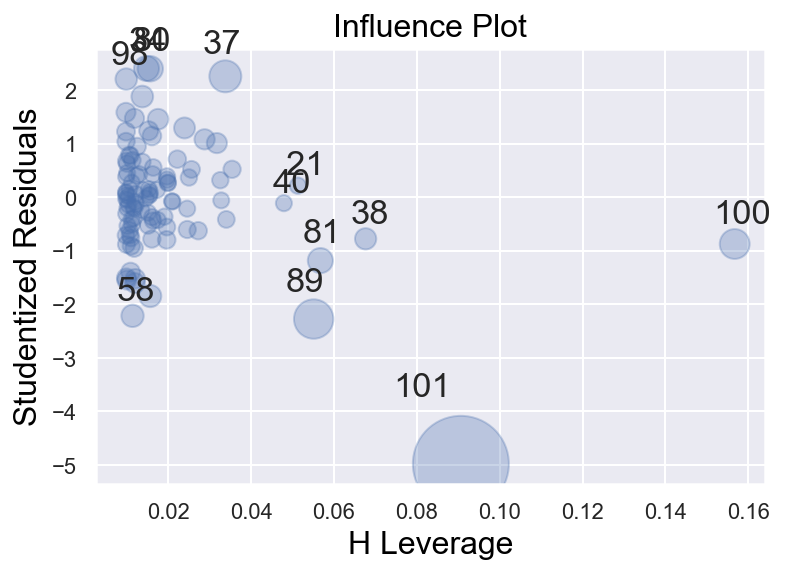

In [13]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

다음 그림은 위에서 사용한 데이터에서 Fox recommentation 기준으로 아웃라이어를 선택한 결과이다.

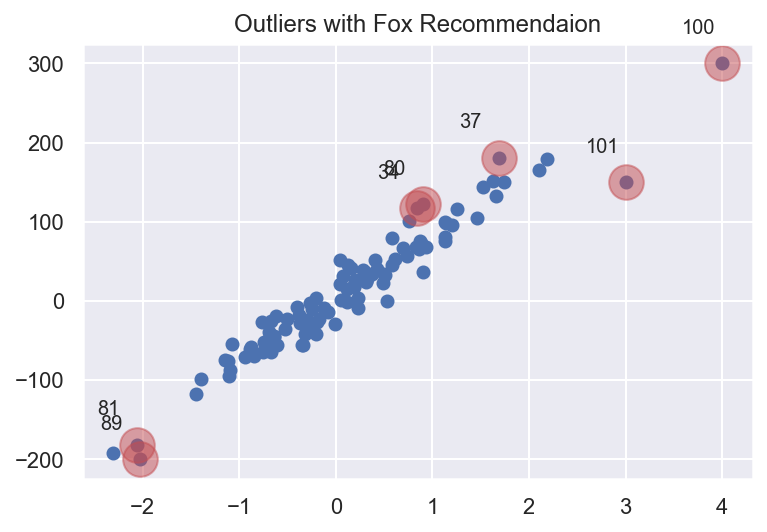

In [106]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Outliers with Fox Recommendaion")
plt.show()

### 보스턴 집값 예측 문제

보스턴 집값 문제에 아웃라이어를 적용해 보자. MEDV가 50인 데이터는 상식적으로 생각해도 이상한 데이터이므로 아웃라이어라고 판단할 수 있다. 나머지 데이터 중에서 폭스 추천공식을 사용하여 아웃라이어를 제외한 결과는 다음과 같다.

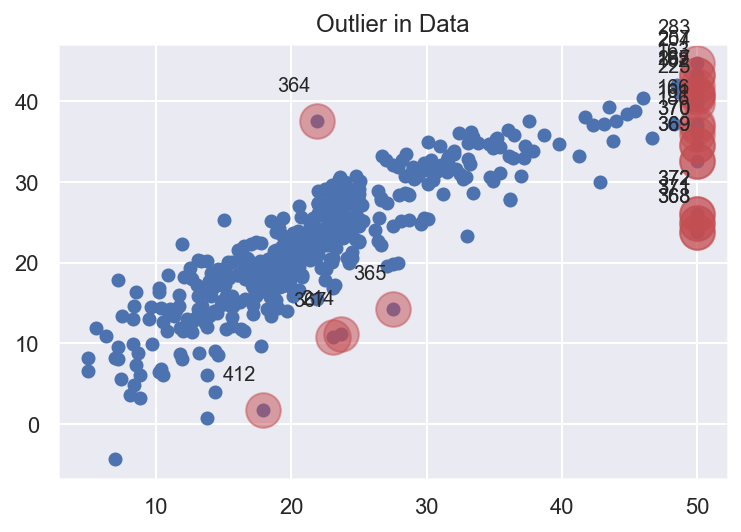

In [107]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Outlier in Data")
plt.show()

지금 위에서는 x축이 실제 집값, y가 예측한 집값.<br>
아래 있는 애들은 실제 집값에 비해 예측한 집값이 너무 싸게 나온 것<br>
위는 반대지<br>
그럼 x=50에 있는 애들은 왜 쫙다 outlier로 나온걸까? <br>
왜 그런지 알 수가 없는데, 아마도 50보다 원래 큰 가격 애들을 50으로 내림친 애들이 아닐까? 

다음은 이렇게 아웃라이어를 제외한 후에 다시 회귀분석을 한 결과이다.<br>
규칙에 잘 맞는 애들만 모아놓은 거니깐, 당연히 퍼포먼스는 올라갔겠지. <br>
근데 그렇다고 해서, 우리의 최종 목표가 더 잘 달성된다는 보장이 없어. <br>
테스트 하려는 실제 데이터에도 아웃라이어가 없으면, 그럼 아웃라이어를 빼고 분석한 결과가 더 좋은 결과를 주겠지.

In [108]:
idx2 = list(set(range(len(dfX))).difference(idx))
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 18 Aug 2021   Prob (F-statistic):          2.41e-161
Time:                        23:36:53   Log-Likelihood:                -1285.2
No. Observations:                 485   AIC:                             2598.
Df Residuals:                     471   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8999      4.107      4.602      0.0

## 5.4 분산 분석과 모형 성능

회귀분석을 하고 나서, 어떤 점수를 매겨야 되잖아. <br>
보통은, 오차가 적으면 좋다고 생각하지. 오차 제곱합으로 평가 하려고 보통 생각해<br>
맞긴 한데, 그렇게 하면 문제가 ***상대적인 비교가 불가능하다.***<br>
RSS는 심지어 데이터 많아지면 커지는 값이잖아. 혹은, 단위만 달라져도 달라지는 값. <br>
그래서 RSS자체로는 모델끼리 비교가 불가능하다. <br>
어떤 ***정규화***가 필요하겠지. 

### 분산 분석

종속변수의 분산과, 독립변수의 분산의 관계를 이용해서 선형회귀의 성능을 평가하는 방법. <br>
이것을 쓰면, 두개의 서로 다른 모델을 보면서 *이 모델이 저 모델보다 더 좋다* 를 판단할 수가 있다. <br>


선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합(RSS: Residula Sum of Square)으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다.

분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

$\bar{y}$를 종속 변수 $y$의 샘플 평균이라고 하자.

$$\bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $$

TSS는 y값의 분산을 의미한다. 사실 엄격히 말하면 분산은 아니다. 아무거로도 안나누고, ${\sum}$만 하잖아.<br> 
종속 변수 $y$의 분산(샘플의 갯수로 나누지 않았으므로 정확하게는 분산이 아니지만 여기에서는 분산이라는 용어를 사용하자)을 나타내는 **TSS(total sum of square)**라는 값을 정의한다. **TSS는 종속변수값의 움직임의 범위**를 나타낸다.

$$\text{TSS} = \sum_{i=1}^N (y_i-\bar{y})^2 = (y - \bar{y}1_N)^T(y - \bar{y}1_N)$$

위 식에서 $\bar{y}1_N$는 $\bar{y}$이라는 스칼라가 $N$번 반복된 브로드캐스팅 벡터다.


마찬가지로 회귀 분석에 의해 예측한 값 $\hat{y}$의 분산을 나타내는 **ESS(explained sum of squares)**,

$$\text{ESS}=\sum_{i=1}^N (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}}1_N)^T(\hat{y} - \bar{\hat{y}}1_N)$$

잔차 $e$의 분산을 나타내는 **RSS(residual sum of squares)**도 정의할 수 있다.

$$\text{RSS}=\sum_{i=1}^N (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값 $\hat{y}$의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 상수항을 포함하여 올바르게 정의되었다면 잔차의 평균이 0이 된다(잔차의 합이 0 이 된다고 했으니깐). 즉, 종속변수의 평균과 모형 예측값의 평균이 같다.

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

그리고 이 분산값들 간에는 다음과 같은 관계가 성립한다. 즉, $y$의 평균은 $\hat{y}$의 평균과 똑같다는 것이 성립한다.

$$\text{TSS} = \text{ESS} + \text{RSS}$$

![1_27.jpeg](./materials/1_27.jpeg)

이는 다음과 같이 증명할 수 있다.

우선 회귀 분석으로 구한 가중치 벡터를 $\hat{w}$, 독립 변수(설명 변수) $x$에 의한 종속 변수의 추정값을 $\hat{y}$, 잔차를 $e$ 라고 하면 다음 식이 성립한다.

$$ y = X\hat{w} + e = \hat{y} + e $$

그리고 $X$의 평균 데이터 $\bar{x}$ *일벡터*

$$ 
\bar{x} = \frac{1}{N}X^T1_N
$$

에 대한 예측값은 $y$의 평균데이터 $\bar{y}$가 되므로(앞에서 가정한 것 중에, 평균 데이터를 넣으면, 평균 y가 나온다고 했음, y hat의 평균이 아니라, 실제 y의 평균이 나온다는 것)

$$
\bar{x}^T\hat{w} = \bar{y}
$$


각 행의 값이 평균 데이터 $\bar{x}$로 반복되는 행렬 $\bar{X}$ *1벡터*

$$
\bar{X} = \frac{1}{N}X^T1_N 1_N^T
$$

에 대한 예측값 벡터는 $\bar{y}$값이 반복되는 벡터가 된다.

$$
\bar{X}\hat{w} = \bar{y}1_N
$$

이를 위 식에 대입하면 

$$
\hat{y} - \bar{y}1_N  = (X- \bar{X})\hat{w} 
$$

가 된다.

그런데 $\bar{X}$와 잔차 $e$는 다음과 같은 직교 관계가 성립한다. 

$$ \bar{X}^Te = \frac{1}{N}X^T1_N 1_N^Te = \frac{1}{N}X^T1_N 0 = 0 $$

직교방정식(잔차가 X와 직교한다는 것은 알고 있음)

$$
X^Te = 0
$$

과 합치면 다음 식이 성립한다.

$$ \bar{X}^Te - X^Te = (\bar{X} - X)^Te $$

따라서

$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y}1_N)^T(y - \bar{y}1_N) \\
&=& (\hat{y} - \bar{y}1_N + e)^T(\hat{y} - \bar{y}1_N + e) \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te + 2(\hat{y} - \bar{y}1_N)^Te \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$


위 식이 말하는 바는 다음과 같다.

> 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

> 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.

간단한 1차원 데이터와 모형을 사용하여 이 식이 성립하는지 살펴보자.

result.uncentered_tss : TSS value <br>
result.mse_model : ESS <br>
result.ssr : RSS <br>

In [17]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

`RegressionResult` 타입 객체는 다음과 같이 분산분석과 관련된 속성값을 가진다.

In [18]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


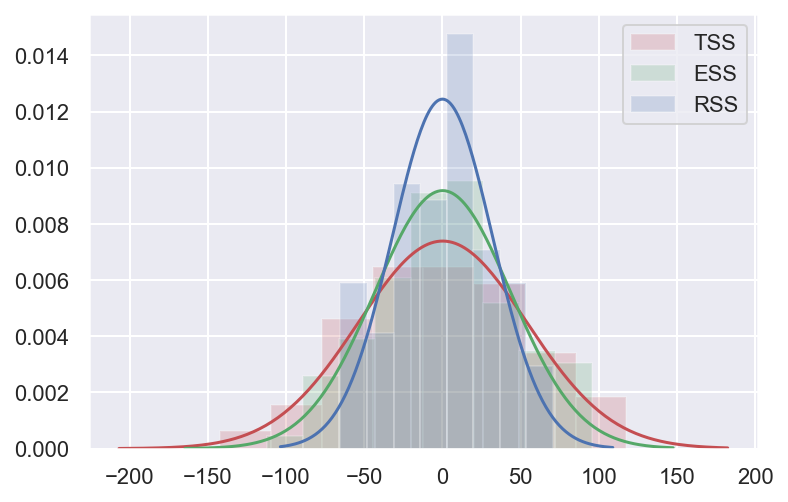

In [19]:
sns.distplot(y,
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()

### 결정계수(Coefficient of Determination)

우리가 만든 모델 중에 가장 좋은 모델은? <br> 
오차가 하나도 없는 모델<br>
오차가 하나도 없으면 Residuals가 다 0. 그러면 $RSS = 0$ <br>
결정계수에서, RSS=0이면, $R^2$값은 1이 된다. <br>
즉, 완벽한 모델일 때, $R^2$값은 1이 된다.<br>
최악의 경우는 RSS가 클수록 나쁜 것. RSS는 TSS만큼 커질 수 있다(위 관계식에서, ESS가 0일 때, TSS=RSS니깐).<br>
최대로 커지면, $R^2$값은 0이 된다.<br> 

<br>
<br>
다른 방식으로도 설명해 보자면, 모델이 최고로 좋으면, 우리가 예측한 y hat값과 실제 y값이 같겠지. <br>
그러면, TSS=ESS가 된다는 것이고, $R^2$값은 1이 된다. <br>
가장 안좋을때는, ESS가 하나도 안움직일 때, 분산이 0이야.<br>

위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

분산 관계식과 모든 분산값이 0보다 크다는 점을 이용하면 $R^2$의 값은 다음과 같은 조건을 만족함을 알 수 있다.

$$0 \leq R^2  \leq 1$$

여기에서 $R^2$가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.
반대로 $R^2$가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다.
따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

### 분산 분석표

분산 분석의 결과는 보통 다음과 같은 분산 분석표를 사용하여 표시한다. 아래의 표에서 $N$은 데이터의 갯수, $K$는 모수의 갯수를 뜻한다.


| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |


$ \dfrac{\text{ESS}}{K-1}$ 이게 $\hat{y}$의 분산을 나타내고 카이스퀘어 분포를 따른다. <br>

$\dfrac{\text{RSS}}{N-K}$는 잔차의 분산을 나타내며 카이스퀘어 분포를 따른다.<br>

***이 두개를 서로 나눈 비율이 F분포를 따르게 된다.*** 그게 우리가 앞에서 본 F-test<br>
이 Test statistics에 맞는 p-value를 구하게 되면, 그게 바로 F테스트의 P-value가 된다. 

표 29.1 : 분산 분석표

그럼, TSS, ESS, RSS는 알겠는데, 왼쪽 오른쪽에 숫자들은 대체 뭐야 또. <br>
바로 F테스트에 대한 것(**Loss Of Fit**). <br>
사실 ***우리가 지금까지 했던, 분산분석과 앞에서 본 F테스트는 같은테스트야.***
<br>
<br>
$R^2=0$이라는 귀무가설을 생각해보자. <br>
언제 0이 된다고? 모델이 하나도 쓸모가 없을  때, ESS가 하나도 안움직일 때. <br>
<br>
근데 하나도 쓸모가 없다는게 앞에서 본, "모든 계수의 값이 0이다"라고 가정하던 F테스트 아닌가?<br>
<br><br>
즉, 두 귀무가설 $R^2=0$, $ H_0 : w_0  = w_1 = \cdots = w_{K-1} = 0 $ 이 두개 사실 같은 귀무가설이야. 


### 회귀 분석 F-검정과 분산 분석의 관계

이러한 모양의 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있기 때문이다. 

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수 $w_i$가 $0$ 이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다 

$$ H_0: R^2 = 0 $$

이 때 $\hat{w}$값은 기대값이 0인 정규 분포에서 나온 표본이므로 예측값 $\hat{y} = \hat{w}^T x$는 정규 분포의 선형 조합이라서 마찬가지로 정규 분포를 따른다. 그리고 잔차(residual)는 오차(disturbance)의 선형 변환으로 정규 분포를 따르므로 ESS와 RSS의 비율은 F 분포를 따른다.

**$ \dfrac{\text{ESS}}{K-1}$, $\dfrac{\text{RSS}}{N-K}$ 사실은 이 두개가 각각 카이스퀘어 분포를 따른다.**<br>
그래서, 각각의 카이스퀘어 분포를 나눈게 F분포를 따르게 된다.



$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} \sim F(K-1, N-K) $$

따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

그래서 위에서 ANOVA분석을 나타낼 때, 항상 F테스트의 결과랑 같이 나타내는 거야. 

statsmodels 에서는 다음과 같이 `anova_lm` 명령을 사용하여 분산 분석표를 출력할 수 있다. 다만 이 명령을 사용하기 위해서는 모형을 `from_formula` 메서드로 생성하여야 한다.

`anova_lm` 명령으로 구한 F 검정통계량과 유의확률은 모형 `summary` 명령으로 구한 `F-statistic` 및 `Prob (F-statistic)`과 일치한다.

In [20]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


위 표에서는, ESS와 RSS를 보여주네. 

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           6.60e-24
Time:                        17:14:00   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

### 결정 계수와 상관 계수

이름이 왜 $R^2$냐 <br>
진짜로 상관계수의 제곱이랑 똑같음. <br>
$y$와 $\hat{y}$의 상관계수의 제곱 값이랑 똑같음. <br>
신기하네. 

$y$와 $\hat{y}$의 샘플 상관계수 $r$의 제곱은 결정 계수 $R^2$와 같다. 

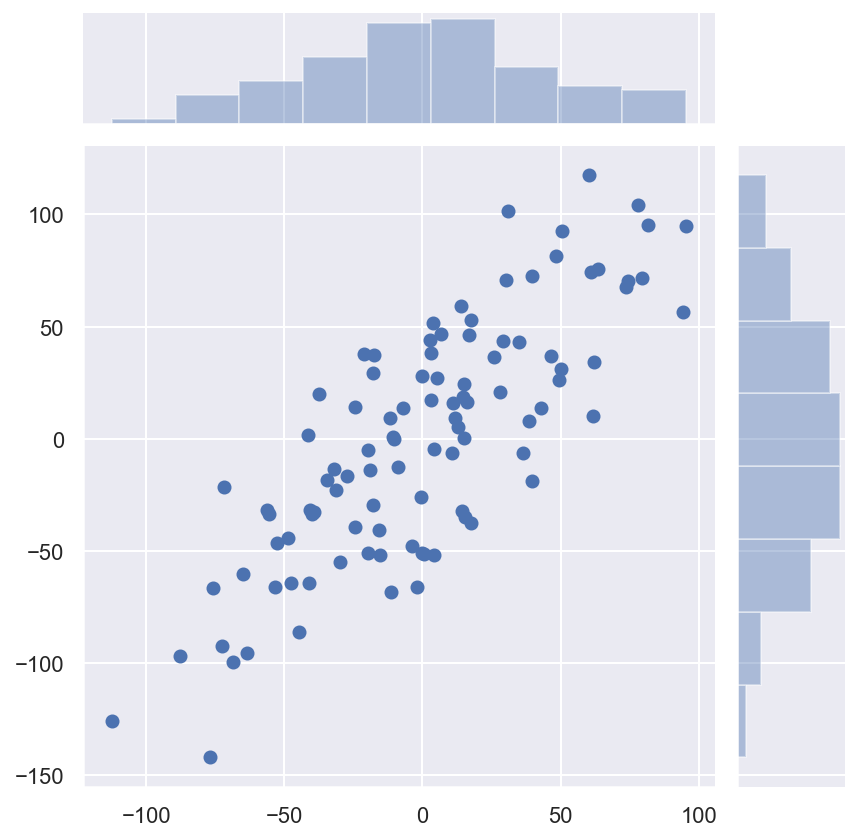

In [22]:
sns.jointplot(result.fittedvalues, y)
plt.show()

### 상수항이 없는 모형의 경우

이 모델, 저 모델 쓰다 보면 가끔씩 상수항이 없는 모델을 쓰는 경우가 있다.<br>
기본적으로는 상수항에 대한 P-value를 확인하기 전까지는, 상수항이 없는 모델을 함부로 쓰면 안된다.<br>
![1_28-2.jpeg](./materials/1_28.jpeg)

모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다.<br>
y 평균이 없어졌네. y 평균을 무조건 0으로 놓은 것.

$$\text{TSS} = \sum_i y_i^2 = y^Ty $$

즉, 실제 샘플평균과 상관없이 $\bar{y} = $이라는 가정하에 TSS를 계산한다. 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지게 된다.

따라서 모형의 결정계수를 비교할 때 **상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [109]:
# 상수한 강제로 0으로 넣었음. 
# R^2가 이상한 값이 나와버림. 
# 함부로 비교하면 안된다는 것.
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [24]:
result2.rsquared

0.18768724705943896

### F 검정을 이용한 모형 비교

전체 모형은 여러가지 데이터를 다 넣어 본 것이고, <br>
축소모형은 그 중에 일부 데이터만 넣어본 것. <br>
만약, 축소모형/전체모형 둘다 써도 된다는 결론이 나면? <br>
아래에서 w2, w3가 0이라는 것이잖아. 그것을 알아보겠다는 거야. 

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다. 

* 전체 모형(Full Model): $$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$
* 축소 모형(Reduced Model): $$ y = w_0 + w_1 x_1 $$


다음과 같은 귀무 가설을 검정하는 것은 위의 두 모형이 실질적으로 같은 모형이라는 가설을 검장하는 것과 같다.

$$ H_0: w_2 = w_3 = 0 $$

이 검정도 F 검정을 사용하여 할 수 있다. StatsModels에서는 `anova_lm` 명령에 두 모형의 result 객체를 인수로 넣어주면 이러한 검정을 할 수 있다. 인수를 넣어줄 때는 축소 모형(reduced model), 전체 모형(full model)의 순서로 넣어준다.

In [25]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [110]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

# INDUS와 AGE를 빼봤음. p-value가 엄청 컸었거든.
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)


# 각각의 모형 구한 result를 넣는다.
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


여기 위에 나온 p-value가 바로, 
$$ H_0: w_2 = w_3 = 0 $$
이 귀무가설을 증명하는 것. p-value가 94%면, w2, w3가 필요가 없다는 거야. 

우리가 회귀분석 summary를 보고 빼도 되고, 실제로 꼭 이 검정을 거칠 필요는 없음.<br>
그러나, 그렇다고 두 검정이 완전히 똑같은 것은 아님. <br>
summary에서 나온 각 변수의 p-value는 그 해당 변수만 바라보고 검정한 것이고, <br>
여기서는 두개를 동시에 빼놓고 검정하고 있는 것. <br>

### F 검정을 사용한 변수 중요도 비교

데이터 분석을 하다보면, feature가 엄청 많은 경우 해당 Feature를 빼야 하는 경우가 있다. <br>
특히 다중공선성이 있어서, condition number가 크게 나오고 그런 경우에는 변수 빼야지<br>
뺄때 가능하면, y값에 영향을 덜 미치는 애들을 빼는게 좋겠지.<br>
그 덜미친다 안미친다를 판단하는 것이 이 검정.

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다. 예를 들어 보스턴 집값 데이터에서 CRIM이란 변수를 뺀 모델과 전체 모델의 비교하는 검정을 하면 이 검정 결과는 CRIM변수의 중요도를 나타낸다.

In [28]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


`anova_lm` 명령에서는 `typ` 인수를 `2`로 지정하면 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산할 수 있다.<br>
즉, 전체 다 들어간 모델과 딱 얘만 뺀 모델을 비교한다.<br>
그러면 사실 summary에 써 있던것과 똑같은거야. 같은 결과가 나온다. <br>
실제로 해보면, 아예 동일한 $p-value$ 값이 나옴. <br>
<br>
다만, 여기서는 표가 뒷자리까지 세세하게 나와서 상대적인 값을 비교하기 좋아서 쓴다.<br>
summary print해보면, 다 0.000, 0.000 이렇게 나오니깐 비교가 어렵다.

In [29]:
model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12


여기서 보고, 누가 누가 더 작냐로 판단하면 된다.<br>
***더 작을수록, 그 w가 0이 더 쎄게 아니라는 것이고, 영향이 더 크다는 거지.*** <br>
변수 제거해야된다고 하면, 이 순서로 제거해야 된다는 거지. 

이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 t 분포와 F 분포의 동치 성질 때문이다.

$$ t_n^2 = F_{(1, n)} $$

In [113]:
# 실제로도 똑같이 나온다.
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        01:21:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### 조정 결정 계수

선형회귀에서 독립변수 10개 넣었더니, $R^2=0.7$이 나왔다. <br>
그런데, 변수으로 하나 더 넣어서 11개 넣으면, 성능이 ***항상 더 좋아진다.***<br>
그것을 수학적으로 증명할 수 있다.<br>

선형 회귀 모형에서 독립 변수가 추가되면 결정 계수의 값은 항상 증가한다. 이는 다음과 같이 확인할 수 있다.

종속 변수 $y$를 회귀 분석하기 위한 기존의 독립 변수가 $X$이고 여기에 추가적인 독립 변수 $z$가 더해졌을 때, 다음과 같은 관계가 성립한다.

$$
R^2_{Xz} = R^2_{X} + (1-R^2_{X})r^{\ast 2}_{yz}
$$

여기에서 
* $R^2_{X}$: 기존의 독립 변수 $X$를 사용한 경우의 결정 계수
* $R^2_{Xz}$: 기존의 독립 변수 $X$와 추가적인 독립 변수 $z$를 모두 사용한 경우의 결정 계수
* $r^{\ast 2}_{yz}$: 추가적인 독립 변수 $z$와 종속 변수 $y$간의 상관 관계 계수(이 세상 모든 데이터를 다 따져봐도, 정확히 correlation이 0이 나오는 경우는 존재하지 않는다)


이고 이 항목들은 모두 양수이므로 

$$
R^2_{Xz} \geq R^2_{X}
$$

근데 성능이 좋아지는게, 과최적화 때문에 좋아지는 경우가 대부분이다. <br>
과최적화 때문에 좋아진건지, 진짜 좋아진건지를 알려면, 나중에 하게 될 교차검증 같은 것을 해야 함. <br>
그런데, 교차검증 안해도, 대략적으로 ***변수 갯수만큼 패널티***를 줘서 산출한 점수가 있음.<br>
변수가 많을 수록, 패널티를 줘서 $R^2$ 값을 깎아준다.

이러한 독립 변수 추가 효과를 상쇄시키기 위한 다양한 기준들이 제시되었다. 그 중 하나가 다음과 같이 독립 변수의 갯수 $K$에 따라 결정 계수의 값을 조정하는 조정 결정 계수이다

$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$



우리가 w를 구할때, maximum likelihood estimation을 했음. <br>
***우리가 가진 모델에서 이런 현재 데이터가 나올 수 있는 확률을 높이면서 구한거야.*** <br>
그러면, 이게 높을 수록 좋은거지. 높을 수록 우리 모델에서 이 데이터들이 나올 확률이 높다는 것. <br> 현재 최적화가 되어 있는 상태니깐, 여기 써 있는 값이 우리가 최고로 높인 값인 거야.  0 으로 다가갈수록 큰거야. 그게 바로, summary table에 써있는 `log-likelihood` <br>
근데, 이것도 변수가 많으면 높게 나와. <br>
그래서, 그것을 다시 보정해준 것이, `AIC`, `BIC`<br>

### 정보량 규준

`Log Likelihood`를 보정하면서, -를 붙였어. <br>
여기서는 더 작은게 좋은 것.<br>
작은게 좋은거니깐, 변수의 갯수가 많아지면, 즉 K가 커질수록 값이 커지게 패널티를 줘야지. 

조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준은 최대 우도에 독립 변수의 갯수에 대한 손실(penalty)분을 반영하는 방법이다. 
이를 정보량 규준(information criterion)이라고 하며 손실 가중치의 계산 법에 따라 AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion) 두 가지를 사용한다.

AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하기 위한 시도에서 나왔다. BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도되었다. 둘 다 값이 작을 수록 올바른 모형에 가깝다.

$$
\text{AIC} = -2\log L + 2K
$$

$$
\text{BIC} = -2\log L + K\log n
$$

지금부터는 내가 쓰는 모델이 괜찮은지를 판단해서 조금씩 바꿔가는 과정을 다룬다.

## 6.1 모형 진단과 수정

회귀분석 결과의 진단(diagnosis)이란 회귀분석에 사용된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지를 확인하는 과정이다. 

## 잔차 정규성

잔차의 정규성이 충족이 안되면(어느정도 충족 되고 안되야 한다는 법이 있는 것은 아니지만), <br>
모델이 뭔가 잘못되었을 가능성이 크다는 것.<br>
하다보면 노하우가 생김.

데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다. 예를 들어 다음과 같이 2차 비선형 관계를 가지는 데이터를 선형 모형으로 회귀 분석한 경우를 살펴보자.

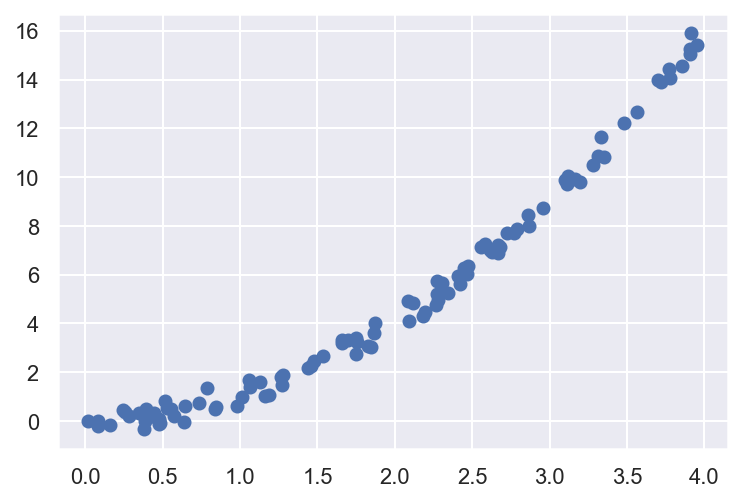

In [30]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [31]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

QQ플롯과 정규성 검정에서 보듯이 잔차는 정규 분포를 따르지 않는다.

이유를 추론해보자면, 애초에 x,y의 상관관계가 선형이 아님. <br>
아래서 Omni-test해봐도, normal 분포가 아닌 것이 명확하다. <br>
***그 이유가 데이터 자체가 비선형이였다는 것.***

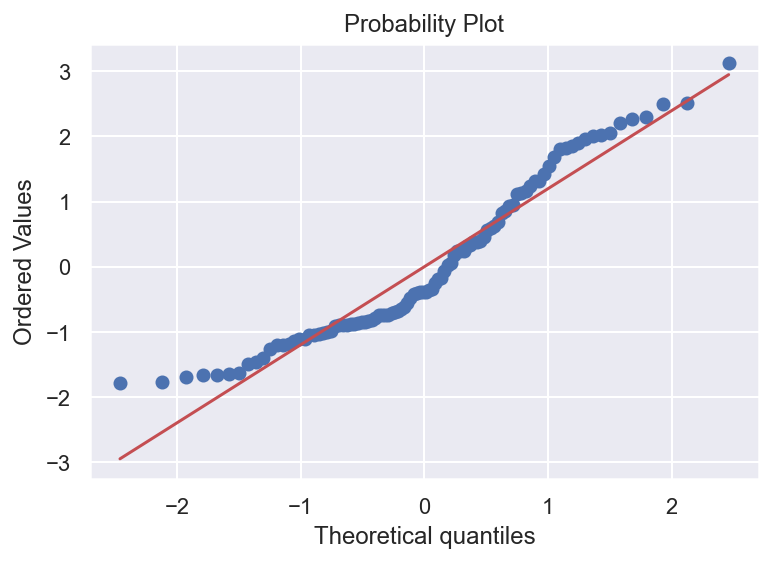

In [32]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [33]:
test = sm.stats.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


잔차가 normal분포가 아니면 일단<br>
**"데이터가 비선형이 아닌가?"** 를 가장 1차적으로 의심해야 한다. <br>
근데 아래를 보면 알겠지만, 데이터가 비선형이라고 꼭 다 잔차가 normal분포가 나오지 않는 것은 아님. <br>
즉, 잔차가 정규분포 따른다고 해서 다 안심할 수 있는 것도 아니라는 것. <br>

## 잔차와 독립 변수의 관계

이번에는 또다른 데이터를 살펴보자. 이 데이터도 2차 함수 관계를 따르고 있으므로 선형 모형을 따르지 않는다.

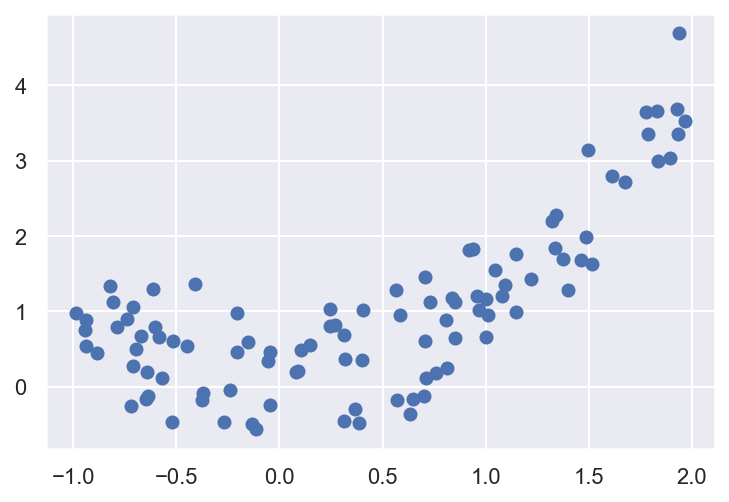

In [34]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [35]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

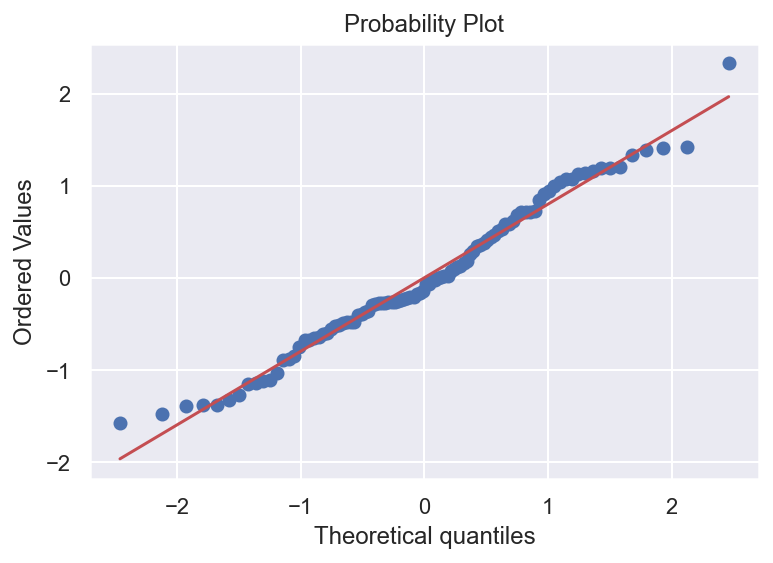

In [36]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [37]:
test = sm.stats.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


데이터가 모형 가정을 따르지 않지만(선형 가정) 잔차는 정규 분포를 따르는 것을 알 수 있다.

이러한 경우에는 잔차와 독립 변수간의 관계를 살펴보는 것이 도움이 될 수 있다. ***데이터가 올바른 모형으로 분석되었다면 잔차는 더이상 독립 변수와 상관관계를 가지지 않아야 한다.*** 만약 잔차와 독립 변수간에 어떤 비선형 상관관계를 찾을 수 있다면 올바른 모형이 아니다.

다만 잔차와 특정 독립 변수간의 관계를 전체 모형이 올바른 모형이 아니라는 것을 알려줄 뿐이지 어떤 모형이 올바른 모형인지에 대한 정보는 주지 않는다.<br>
<br>

생각해보면, 아래 그래프는 $E[\epsilon|x]=0$의 가정을 만족하지 않는 것. 즉, 어떤 x가 주어지든 잔차/입실론의 평균값은 0 이여야 한다. x를 -1~0.5근처에서 짤랐다고 해보자. 기댓값이 0이 아니지. <br><br>
사실 더 직관적인 생각은, 잔차라는 것은 우리가 선형회귀로 에측하고 남은 찌꺼기야. <br>
올바르게 선형회귀가 됬으면, 우리가 모든 예측을 하고 남은 찌꺼기는 더 이상 예측이 안되야함<br>
영양분을 빨아들일 만큼 다 빨아들였으면 그게 당연하지. 잔차에는 예측할 수 있는 무엇인가가 남아있으면 안돼. <br>
근데 아래를 보면, X1과 잔차간의 상관관계가 남아있잖아. 선형이 아니라서 남아있었던 거야. <br>
그럼, 아래의 그래프 모양과 비슷한 feature를 우리가 만들어 주면 된다. $x_1^2$같은 것을 넣어 줘 봐야겠지.  <br>
이렇게 데이터 변형하면서 자꾸 추가 해 주면서 모델을 좋게 만드는거야. 

## 이분산성

지금 아래 그래프는 x와 잔차에 대한 그래프이다. <br>
아래 데이터를 보면, 4번을 만족하지 않는 것. <br>
"모든 샘플에 대해서 epsilon의 분산이 똑같아야 한다." <br>
다만, 우리는 epsilon을 알 수가 없지. <br>
고로, 모집단 회귀식의 오차항(εi)을 간측할 수 없으므로 이에 대한 추정치인 잔차값을 이용하여 이분산 여부를 파악할 수 있다<br>
$$ \text{Var}[e_i] = \sigma^2 (1 - h_{ii}) $$ 
왜냐면, 잔차의 분산은 입실론의 분산에 비례하니깐.


[REFERENCE](http://contents.kocw.net/document/ch9_5.pdf)

선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 **이분산성**(heteroskedastic) 문제가 발생한다. 종속변수를 로그 변환한 트랜스로그(translog) 모형을 사용하면 이분산성 문제가 해결되는 경우도 있다.

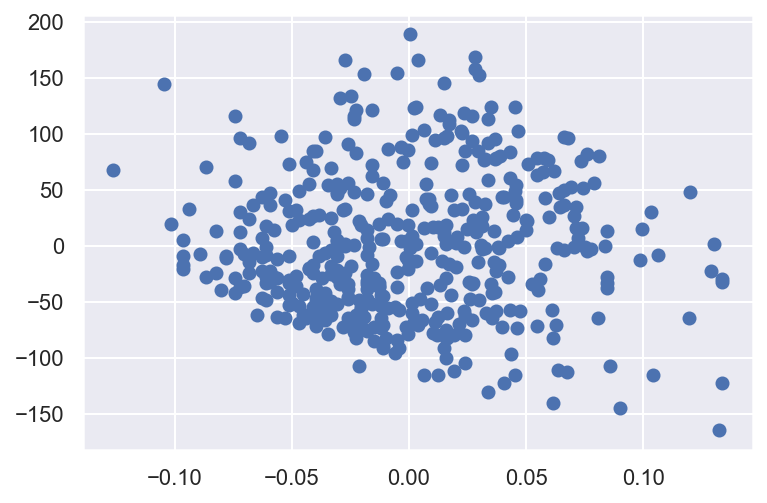

In [39]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show()

y값을 로그 취하는 방법을 자주 쓴다. 정답은 없다.

## 자기 상관 계수

서로 다른 Y들끼리 상관계수가 있으면 안된다. 만약 있게 되면, ***[시계열 모형](http://www.kmooc.kr/assets/courseware/v1/0adbcd1332f1b7d2276215758a75b099/asset-v1:JEJUk+KOCW_JEJU01+2018_2+type@asset+block/Econometrics_10.pdf)***을 사용해야 한다. <br>
시계열 모형이 필요할 때, 더 공부해 보자.

선형 회귀 모형에서는 오차(disturbance)들이 서로 (모수-조건부) 독립이라고 가정하고 있다. 따라서 잔차(residual)도 서로 독립이어야 한다. 만약 서로 독립이 아니라면 선형회귀 모형이 아닌 ARMA 모형 등의 시계열 모형을 사용해야 한다.

오차가 독립인지 검정하는 방법은 잔차를 시계열로 가정하여 자기상관계수를 구하는 것이다. 만약 독립이라면 시차(lag)가 0인 경우를 제외하고는 자기상관계수 $\rho_l$ 이 0이어야 한다. 이를 검사하는 검증으로는 다음과 같은 것들이 있다.

* Box-Pierce 검정
* Ljung-Box 검정
* Durbin-Watson 검정

이 검정들은 다음과 같은 귀무 가설을 검증한다.

$$
H_0: \rho_l = 0 \;\;\;\text{ for } i = 1, 2, \cdots, l
$$


여기에서는 회귀분석의 성능을 향상시키거나 모형이 가지는 제한조건 등을 충족시키기 위해 모형을 비선형으로 변형(transform)하는 방법에 대해 알아본다. 

### 비선형 변형

가장 쉬운 방법은 x/y에 둘다 $log$를 취하면 직선이 될 가능성이 높아진다.<br>
그런데, 휘어졌으니깐, 2차항을 적용시키는 것도 방법 중 하나가 된다. 

만약 독립변수와 종속변수간의 관계가 비선형이면 이 관계를 선형으로 바꿀 수 있도록 독립변수를 비선형 변환할 수 있다. 예를 들어 보스턴 집값 데이터에서 집값과 LSTAT 데이터는 다음 그림에서 보듯이 비선형 관계를 가진다.

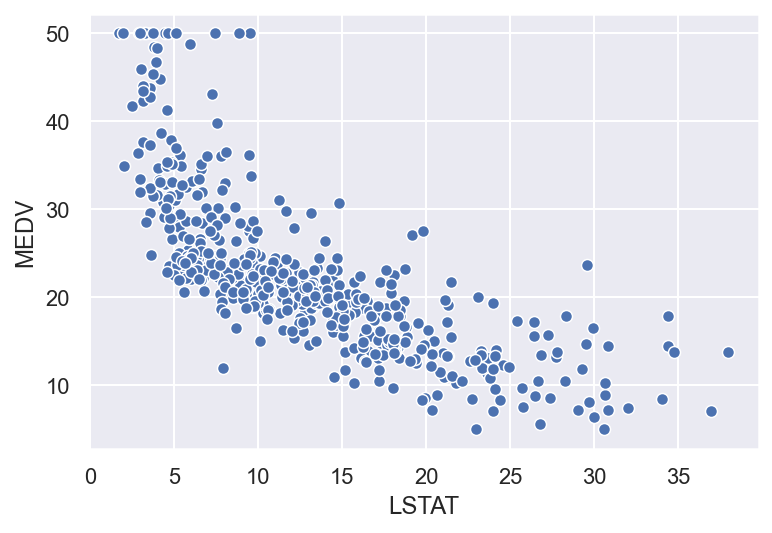

In [41]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

이 데이터를 그냥 사용하여 LSTAT과 종속변수간의 선형모형을 구한 결과는 다음과 같다.

In [42]:
model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           5.08e-88
Time:                        17:22:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

다음 그림은 예측값과 실제 데이터를 비교한 것이다. 선형모형이 적합하지 않음을 알 수 있다. 

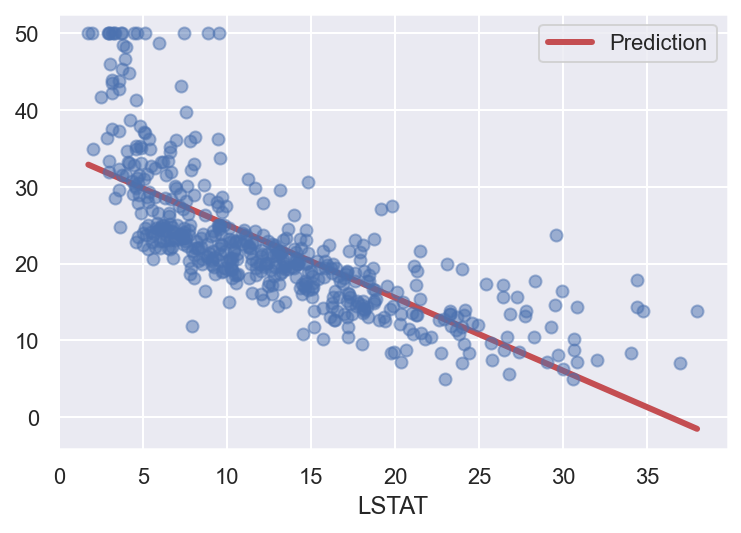

In [43]:
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

이번에는 LSTAT값을 제곱한 비선형 독립변수를 추가한다. 결과가 향상되었다.

In [114]:
# 제곱한 항을 추가
model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)", data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          1.56e-112
Time:                        13:51:46   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

실제 데이터와 예측값을 비교해보면 선형모형보다 적합한 모형임을 알 수 있다.

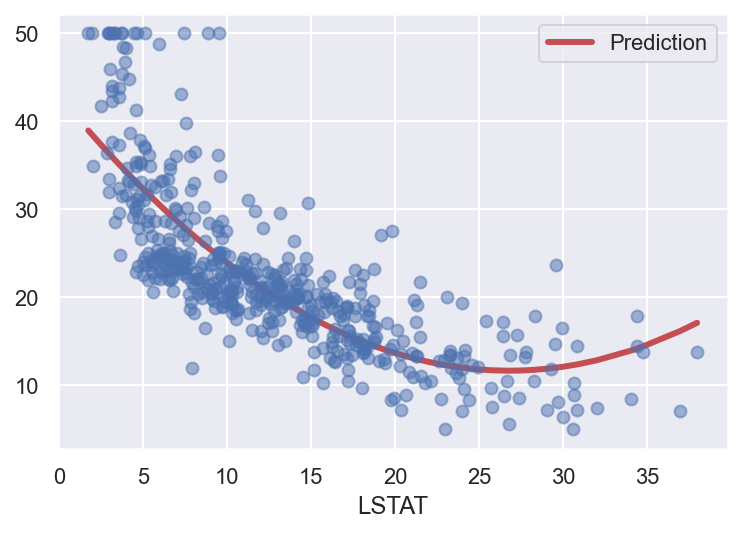

In [45]:
y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

정답은 없다. Trial and Error

### 범주형을 사용한 비선형성

$x^2, x^3$등을 넣어서, 비 선형성을 만들 수도 있지만, 범주형을 활용할 수도 있다. <br>
**실제로 다항식을 너무 심하게 이용하면, overfitting이 자주 일어나기도 한다.**

![1_29.jpeg](./materials/1_29.jpeg)

독립변수의 비선형성을 포착하는 또 다른 방법 중 하나는 강제로 범주형 값으로 만드는 것이다. 범주형 값이 되면서 독립변수의 오차가 생기지만 이로 인한 오차보다 비선형성으로 얻을 수 있는 이익이 클 수도 있다. 

보스턴 집값 데이터에서 종속변수와 RM 변수의 관계는 선형에 가깝지만 방의 갯수가 아주 작아지거나 아주 커지면 선형모형에서 벗어난다. 

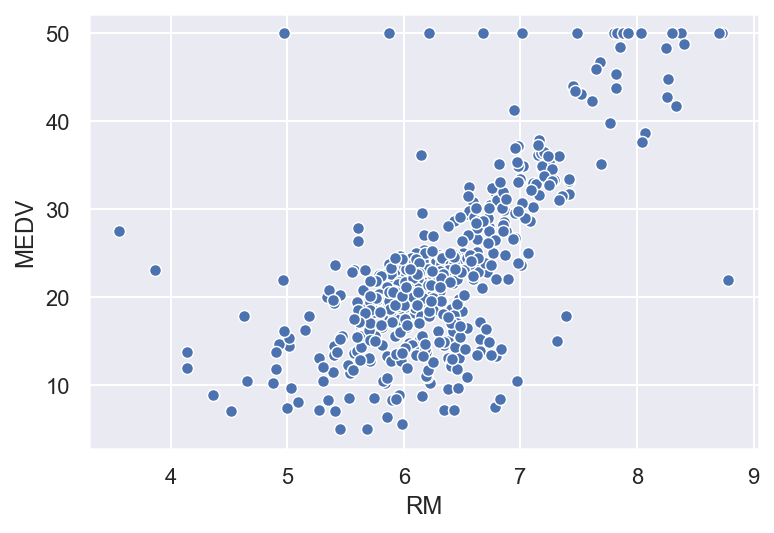

In [46]:
sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()

In [47]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.49e-74
Time:                        17:23:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

RM 변수값을 강제로 정수로 라운딩(rounding)하면 RM 변수가 가지는 비선형성을 잡을 수 있다. 다음 플롯은 카테고리값으로 변한 RM 변수와 종속변수의 관계를 시각화한 것이다.

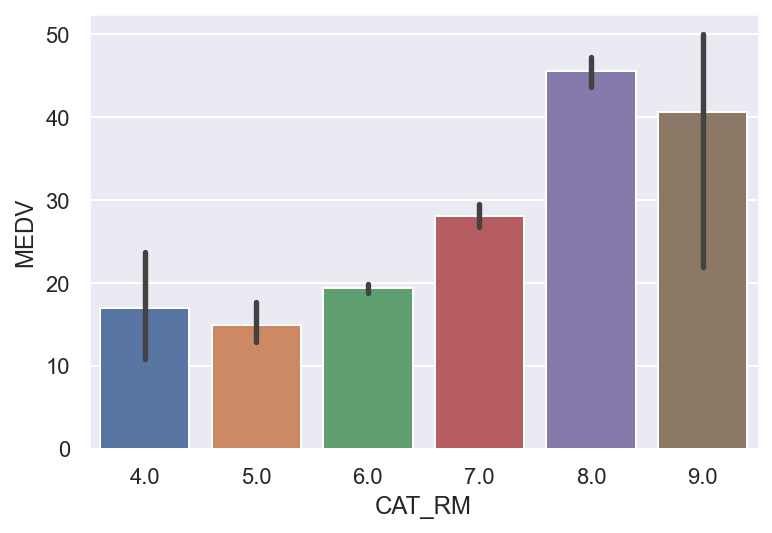

In [48]:
rooms = np.arange(3, 10)
labels = [str(r) for r in rooms[:-1]]
df_boston["CAT_RM"] = np.round(df_boston.RM)

sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)
plt.show()

이렇게 하면 RM 변수으로 인한 종속변수의 변화를 비선형 상수항으로 모형화 할 수 있다. 선형모형보다 성능이 향상된 것을 볼 수 있다.

In [49]:
model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))", data=df_boston)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           3.57e-81
Time:                        17:24:19   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

### 시간 독립변수의 변형

시간은 기본적으로, 기준 시간을 두고, 거기서 얼마나 흘렀는지로 실수값으로 바꿔주는 것이 기본<br>
그것을 ***epoch*** 라고 부른다.

독립변수가 시간인 경우에는 특정 시점에서 경과된 시간값으로 변형해야 한다. 일간 전기 사용량 데이터를 예로 들어 설명한다.

In [50]:
data = sm.datasets.get_rdataset("elecdaily", package="fpp2")

df_elec = data.data.drop(columns=["WorkDay", "Temperature"])
df_elec["Date"] = pd.date_range("2014-1-1", "2014-12-31")
df_elec.tail()

,Demand,Date
360,173.727990,2014-12-27
361,188.512817,2014-12-28
362,191.273009,2014-12-29
363,186.240144,2014-12-30
364,186.370181,2014-12-31


파이썬 `datetime` 자료형은 `toordinal` 명령으로 특정 시점(보통은 1970년 1월 1일을 기준으로 몇초가 흘렀는지로 바꿔준다)으로부터 경과한 시간의 일단위 값을 구하거나  `timestamp` 메서드로 초단위 값을 구할 수 있다.

In [115]:
import datetime as dt

df_elec["Ordinal"] = df_elec.Date.map(dt.datetime.toordinal) # 날짜
df_elec["Timestamp"] = df_elec.Date.map(dt.datetime.timestamp) # seconds
df_elec.tail()

,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,173.727990,2014-12-27,735594,1.419610e+09,2014,12,361,31,5,52,5,False,False
361,188.512817,2014-12-28,735595,1.419696e+09,2014,12,362,31,6,52,6,False,False
362,191.273009,2014-12-29,735596,1.419782e+09,2014,12,363,31,0,1,0,False,False
363,186.240144,2014-12-30,735597,1.419869e+09,2014,12,364,31,1,1,1,False,False
364,186.370181,2014-12-31,735598,1.419955e+09,2014,12,365,31,2,1,2,False,True


여기에서는 일단위 시간 값을 사용하여 회귀분석을 한다. 시간 값의 경우 크기가 크므로 반드시 스케일링을 해 주어야 한다.<br>
1970년 1월 1일부터 흐른 초면, 숫자가 몇십억이 나옴. 그대로 쓰면, condition number가 망한다.

In [52]:
model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)", data=df_elec)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           0.000739
Time:                        17:24:54   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

시간에는 엄청 많은 속성들이 안에 embed되어 있음. <br>
***보통은 따로따로 떼서, 별도로 독립변수 만드는게 좋다.*** <br>
아래처럼<br>
해봤는데, 비선형성이 너무 심하면, 위에서 얘기한 것 처럼 카테고리 값으로 만들어줘 본다. 

하지만 시간 독립변수는 이 외에더 다양한 특징들을 숨기고 있다. 예들 들어 연도, 월, 일, 요일 데이터를 별도의 독립변수로 분리하거나 한 달 내에서 몇번째 날짜인지 월의 시작 또는 끝인지를 나타내는 값은 모두 특징값이 될 수 있다. 판다스에서는 `dt` 특수 연산자를 사용하여 이러한 값을 구할 수 있다. 

In [53]:
df_elec["Year"] = df_elec.Date.dt.year
df_elec["Month"] = df_elec.Date.dt.month
df_elec["DayOfYear"] = df_elec.Date.dt.dayofyear # 1년 중 몇번째 날인가
df_elec["DayOfMonth"] = df_elec.Date.dt.daysinmonth # 한 달 중 몇번째 날인가
df_elec["DayOfWeek"] = df_elec.Date.dt.dayofweek 
df_elec["WeekOfYear"] = df_elec.Date.dt.weekofyear
df_elec["Weekday"] = df_elec.Date.dt.weekday
df_elec["IsMonthStart"] = df_elec.Date.dt.is_month_start
df_elec["IsMonthEnd"] = df_elec.Date.dt.is_month_end
df_elec.tail()

<ipython-input-53-1e6bbc26e959>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_elec["WeekOfYear"] = df_elec.Date.dt.weekofyear


,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,173.727990,2014-12-27,735594,1.419610e+09,2014,12,361,31,5,52,5,False,False
361,188.512817,2014-12-28,735595,1.419696e+09,2014,12,362,31,6,52,6,False,False
362,191.273009,2014-12-29,735596,1.419782e+09,2014,12,363,31,0,1,0,False,False
363,186.240144,2014-12-30,735597,1.419869e+09,2014,12,364,31,1,1,1,False,False
364,186.370181,2014-12-31,735598,1.419955e+09,2014,12,365,31,2,1,2,False,True


이렇게 추가적인 특징값을 이용하여 구한 모형은 성능이 향상된다.

In [54]:
feature_names = df_elec.columns.tolist()
feature_names.remove("Demand")
feature_names.remove("Date")

formula = """
Demand ~ scale(Ordinal) + C(Month) + DayOfYear + 
         C(DayOfMonth) + C(DayOfWeek) + C(Weekday) + C(IsMonthStart) + C(IsMonthEnd)
"""
model6 = sm.OLS.from_formula(formula, data=df_elec)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           4.74e-46
Time:                        17:25:13   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 주기성을 가지는 독립변수

주기성 가지면, $sin$, $cos$으로 바꾸면 된다는 것. ***각도***

독립변수가 주기성을 가지는 경우에는 그대로 사용하면 모형이 주기성을 가지지 못한다. 예를 들어 scikit-learn의 covtype 데이터를 살펴보자. 이 데이터는 원래 특징값들로부터 특정 범주값을 예측하는 분류 문제용 데이터 집합이지만 Aspect라는 변수를 독립변수로 하고 Hillshade_9am라는 변수를 종속변수로 하는 회귀분석 문제로 가정한다. 

In [55]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()

feature_names = ["Aspect", "Hillshade_9am"]
df_covtype = pd.DataFrame(covtype.data[:, [1, 6]], columns=feature_names)
df_covtype = df_covtype.sample(10000, random_state=0)  # 편의상 10,000개 표본 추출
df_covtype.tail()

,Aspect,Hillshade_9am
77297,90.0,235.0
103214,38.0,220.0
459385,79.0,241.0
159359,58.0,225.0
565783,91.0,240.0


Aspect 변수는 도(degree) 단위의 각도를 나타내는 독립변수이므로 0부터 360까지의 값을 가진다. Aspect가 0인 경우와 360인 경우는 독립변수가 실질적으로 같기 때문에 같은 종속변수값을 예측해야 한다.

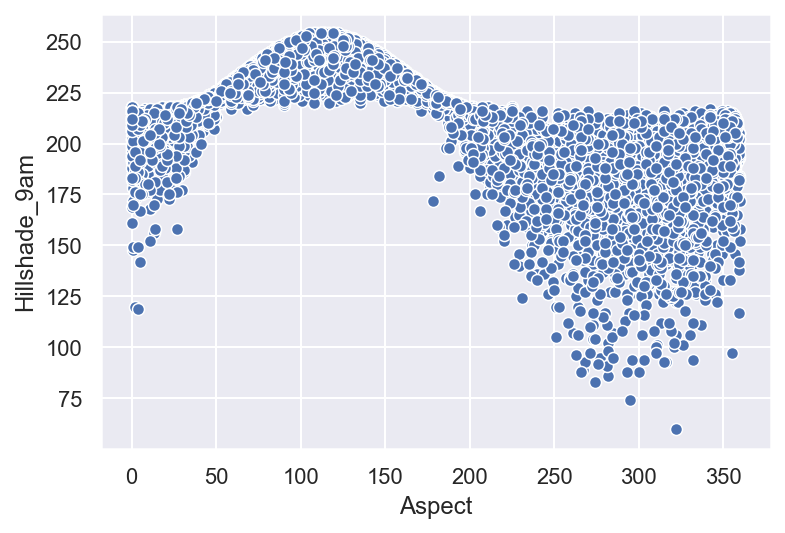

In [56]:
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.show()

하지만 Aspect를 일반 실수형 독립변수처럼 사용하면 Aspect가 0도일 때와 360도일 때 다른 종속변수값이 예측된다. 

In [57]:
model7 = sm.OLS.from_formula(
    "Hillshade_9am ~ Aspect + I(Aspect**2) + I(Aspect**3)", 
    data=df_covtype
)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7974.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:26:43   Log-Likelihood:                -40905.
No. Observations:               10000   AIC:                         8.182e+04
Df Residuals:                    9996   BIC:                         8.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        187.0395      0.485    385.

In [58]:
df_test = pd.DataFrame([[0], [360]], columns=["Aspect"])
df_result7 = result7.predict(df_test)
df_result7

0    187.039453
1    193.002560
dtype: float64

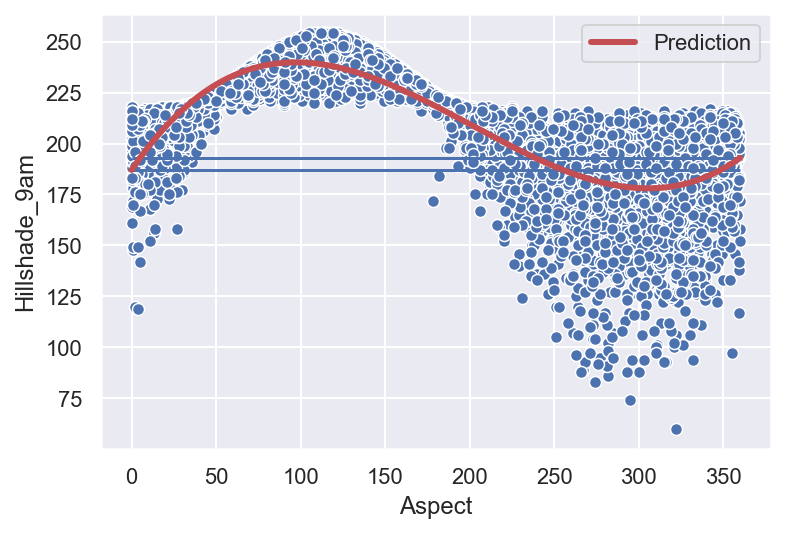

In [59]:
y_hat7 = result7.predict(df_covtype)
df7 = pd.concat([y_hat7, df_covtype.Aspect], axis=1).sort_values("Aspect")
df7.columns = ["Prediction", "Aspect"]
df7.plot(x="Aspect", style="r-", lw=3)
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result7.values[0], 0, 360)
plt.hlines(df_result7.values[1], 0, 360)
plt.show()

이를 방지하기 위해 일반적으로 주기성을 띄는 독립변수는 다음처럼 두 개의 독립변수로 분리한다.

$$
x \;\; \rightarrow
\begin{cases}
x_1 = \cos\left(\frac{2\pi}{360}x\right) \\
x_2 = \sin\left(\frac{2\pi}{360}x\right) 
\end{cases}
$$

In [60]:
f = 2.0 * np.pi / 360

model8 = sm.OLS.from_formula("""
Hillshade_9am ~ 
np.cos(f * Aspect) +
np.sin(f * Aspect)
""", data=df_covtype
)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:26:44   Log-Likelihood:                -40515.
No. Observations:               10000   AIC:                         8.104e+04
Df Residuals:                    9997   BIC:                         8.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8444      0

이렇게 하면 독립변수의 특징을 유지하면서 모형이 주기성을 가지게 된다.

In [61]:
df_result8 = result8.predict(df_test)
df_result8

0    196.069868
1    196.069868
dtype: float64

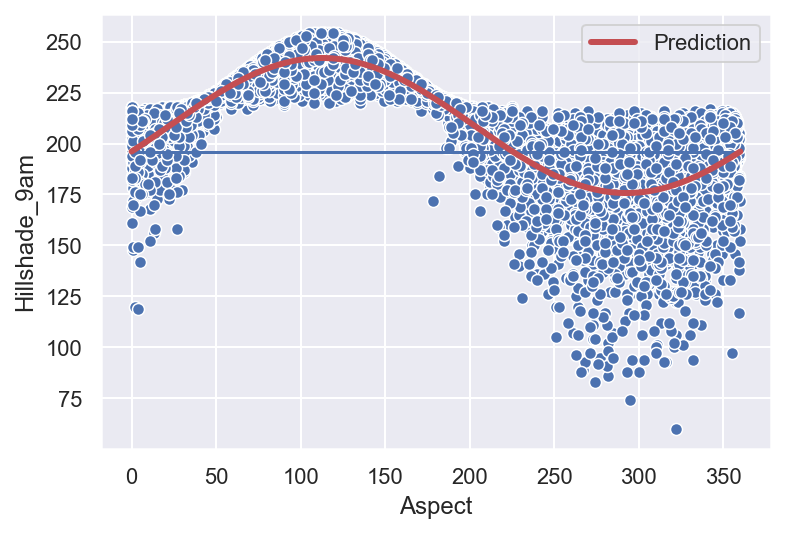

In [62]:
y_hat8 = result8.predict(df_covtype)
df8 = pd.concat([y_hat8, df_covtype.Aspect], axis=1).sort_values("Aspect")
df8.columns = ["Prediction", "Aspect"]
df8.plot(x="Aspect", style="r-", lw=3)
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result8.values[0], 0, 360)
plt.hlines(df_result8.values[1], 0, 360)
plt.show()

### 종속변수 변형

***$y$와 $\hat{y}$값을 그려놓고, y를 수정해 가면서, 조금 더 직선에 나오게 하는 변형을 취해보면서 trial and error해볼 수 있다는 것.***

지금까지는 독립변수를 변형하는 방법을 사용했지만 경우에 따라서는 종속변수를 변형할 수도 있다. 예를 들어 LSTAT 독립변수로 보스턴 집값을 예측하는 선형회귀모형의 예측값과 실제값을 그리면 다음과 같다.

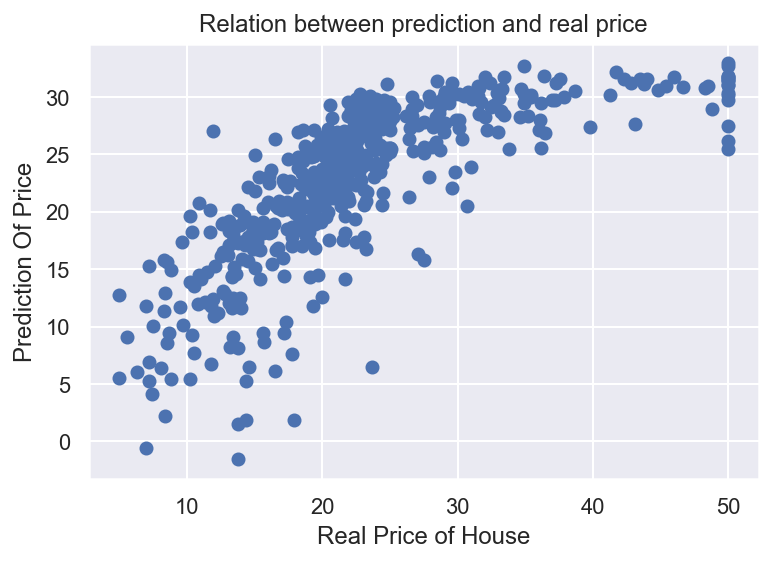

In [116]:
plt.scatter(boston.target, y_hat1)
plt.xlabel(u"Real Price of House")
plt.ylabel(u"Prediction Of Price")
plt.title("Relation between prediction and real price")
plt.show()

모형이 올바르다면 예측치와 실제 종속변수값을 그린 스캐터 플롯은 선형적인 모습이 나와야 한다. 하지만 실제로는 제곱근이나 로그 그래프와 더 유사하다. 이러한 경우에는 이 스캐터 플롯을 선형적으로 만들어 주도록 예측치를 비선형 변환한다. 여러가지 모형을 비교해보면 독립변수와 종속변수를 모두 로그 변환한 모형이 가장 좋다는 것을 알 수 있다.

In [64]:
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          3.09e-105
Time:                        17:27:19   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

y를 변형하면서, 조금 더 직선에 가까운 모양으로 만들어 준 것.

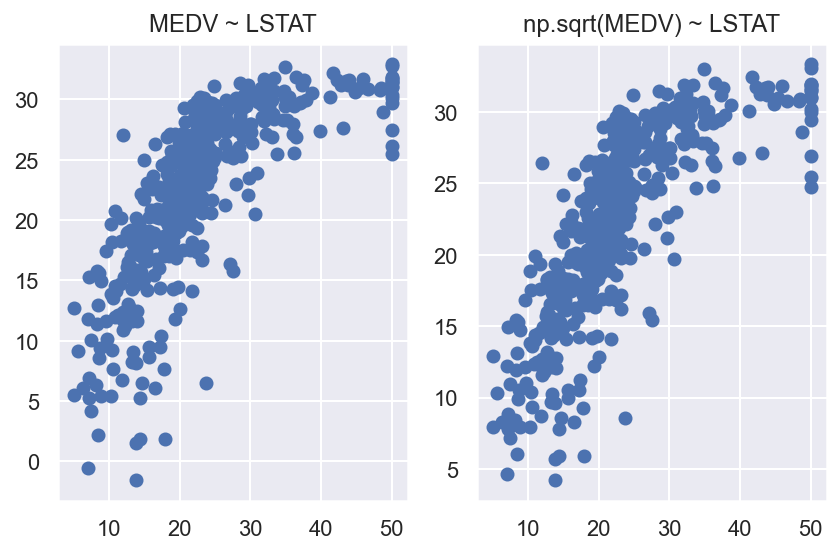

In [65]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

로그도 가능하다.

In [66]:
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          2.23e-116
Time:                        17:27:29   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

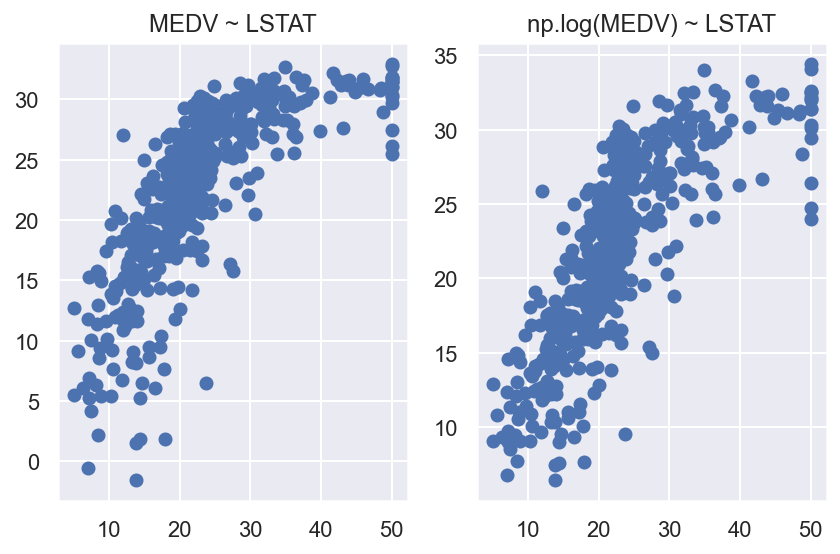

In [67]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

이번에는 $x$와 $y$둘다 로그 취했음.

In [68]:
model13 = sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)", data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          7.32e-126
Time:                        17:27:37   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

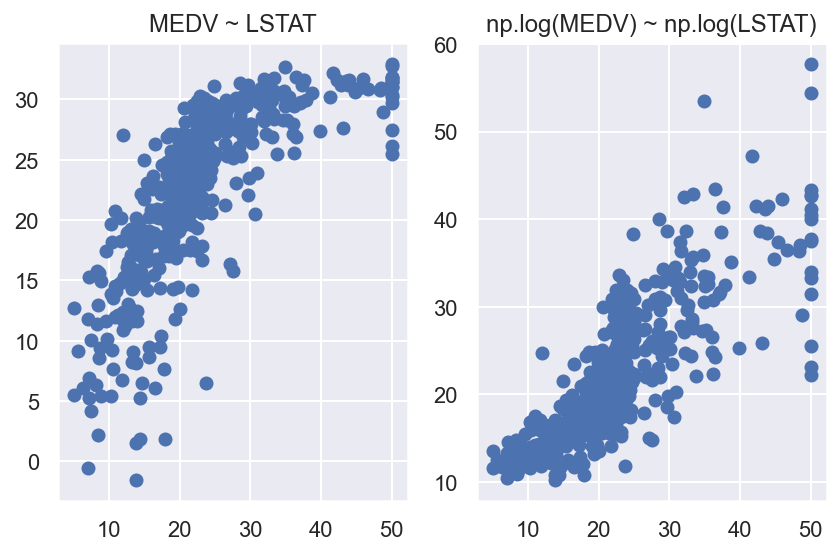

In [69]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")
plt.tight_layout()
plt.show()

## 6.2 기저함수 모형과 과최적화

### 비선형 모형 

기본적인 선형회귀모형은 입력변수의 선형조합으로 이루어진다.

$$ y_i = \sum_{i=1}^{D} w_i x_i = w^T x $$

하지만 데이터가 다음 그림처럼 비선형이면 위와 같은 선형회귀모형은 적합하지 않다. 

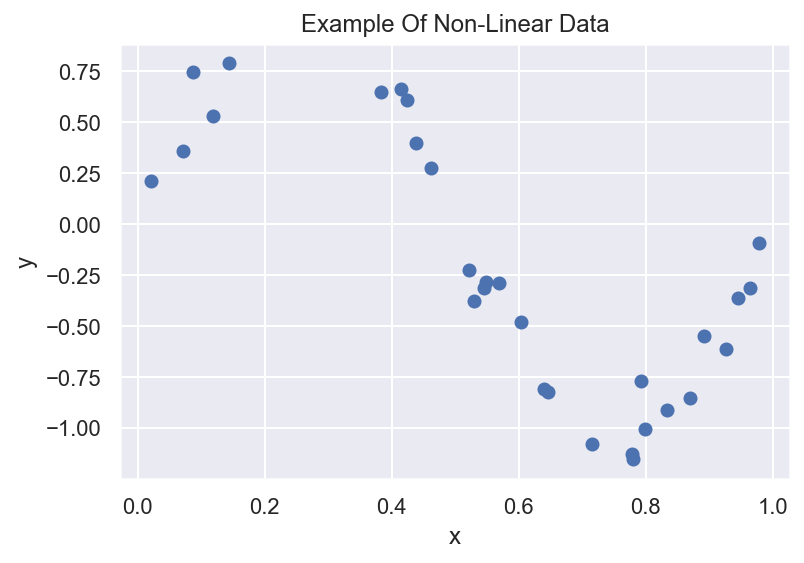

In [117]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example Of Non-Linear Data")
plt.show()

이 때는 독립변수 벡터 $x$를 입력으로 가지는 여러개의 비선형 함수 $\phi_j(x)$들을 생각해 내어 원래의 입력 변수 $x$대신 $\phi_j(x)$들을 입력변수로 사용한 다음과 같은 모형을 쓰면 더 좋은 예측 성능을 가질 수도 있다. 즉, 딱 $X$를 쓰는 것이 아니라, $x$를 변형한 것을 입력 변수로 쓴다는 것. 그럼 분명 $\phi$에 대해서는 선형모델이지. x에 대해서는 비선형 모델인 것.


$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$

이 새로운 모형의 모수의 갯수는 원래의 독립변수의 갯수가 아니라 우리가 생각해 낸 비선형 함수의 갯수에 의존한다.

이렇게 하면, 선형모델에 대한 방법론은 그대로 사용하면서, x에 대한 비선형 모델도 찾아낼 수 있는 것.<br>
문제는 내가 $\phi$를 생각해 내야 한다는 것.<br>
그래서 사람들이 기저함수 라는 것을 생각해 냈다.

### 기저함수

***기저함수는 함수의 수열이다. 함수를 어떤 규칙에 맞게 계속해서 생각해 낼 수가 있다.*** <br>
즉, 이미 어딘가에 생각이 다 놓여져 있는 것. 나는 가져다가 쓰기만 하면 돼. 

하지만 이러한 비선형 모형을 만들기 위해서는 데이터에 적합한 비선형 함수를 충분히 많이 생각해 낼 수 있어야 한다. 이러한 고충을 덜기 위해 만들어진 것이 기저함수(basis function) 모형이다. 기저함수는 특정한 규칙에 따라 만들어지는 함수의 열(sequence)로서 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 있는 것을 말한다.

기저함수 중 가장 간단한 것이 다항 기저함수(polynomial basis function)이다.

$$ \phi_0(x) = 1, \phi_1(x) = x, \phi_2(x) = x^2, \phi_3(x) = x^3, \cdots $$

다항회귀(polynomial regression)는 다항 기저함수를 사용하는 기저함수 모형이다. 따라서 종속 변수와 독립 변수의 관계는 다음과 같이 표현할 수 있다.

$$ y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M $$

기저함수는 사람이 하나씩 생각해내는 것이 아니라 미리 만들어진 규칙에 의해 자동으로 생성되므로 비선형 함수를 만들기 위해 고민할 필요가 없다. 

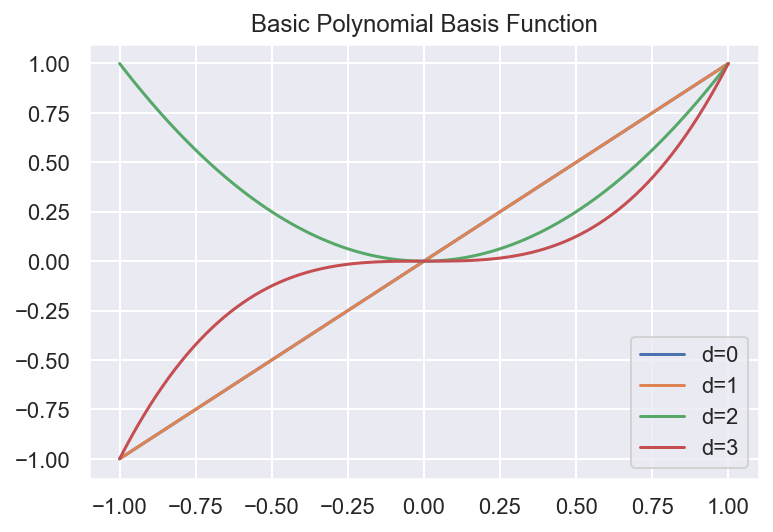

In [118]:
phi_0 = np.polynomial.Polynomial.basis(1)
phi_1 = np.polynomial.Polynomial.basis(1)
phi_2 = np.polynomial.Polynomial.basis(2)
phi_3 = np.polynomial.Polynomial.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("Basic Polynomial Basis Function")
plt.show()

기저함수중에서도 서로 다른 두 기저함수의 곱의 정적분 값이 0이 되면 직교기저함수(orthogonal basis function)라고 한다. 체비세프 다항식은 직교기저함수의 한 예다.

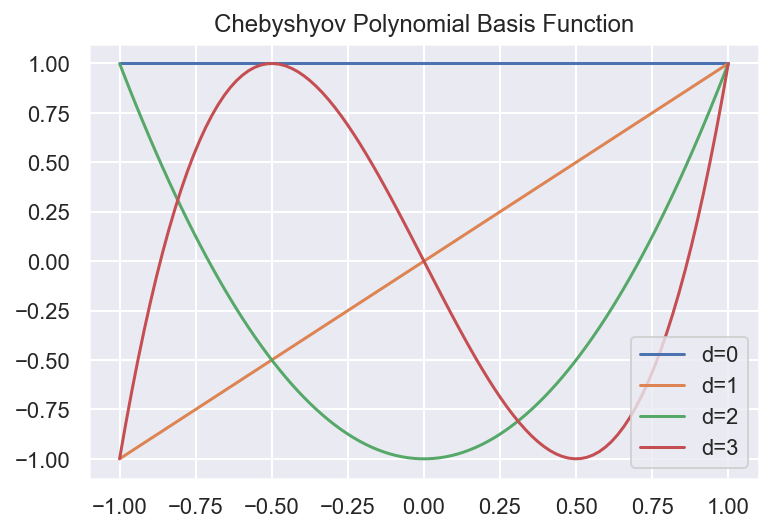

In [121]:
phi_0 = np.polynomial.chebyshev.Chebyshev.basis(0)
phi_1 = np.polynomial.chebyshev.Chebyshev.basis(1)
phi_2 = np.polynomial.chebyshev.Chebyshev.basis(2)
phi_3 = np.polynomial.chebyshev.Chebyshev.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("Chebyshyov Polynomial Basis Function")
plt.show()

이외에도 다음과 같은 기저함수들도 존재한다.

* 방사 기저함수

* 삼각 기저함수

* 시그모이드 기저함수

### StatsModels를 이용한 다항회귀

StatsModels에서는 `OLS` 클래스의 `from_formula` 메서드를 사용하여 다항회귀를 할 수 있다.

In [73]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

# 선형으로 바로 쓴 것
print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.69e-06
Time:                        17:29:47   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [74]:
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           9.14e-06
Time:                        17:29:52   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [75]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.06e-17
Time:                        17:29:56   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

회귀분석 결과를 그림으로 그리면 다음과 같다.

In [122]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)

    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)

    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()

    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("Square N={}, Seed Value={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)

    return result

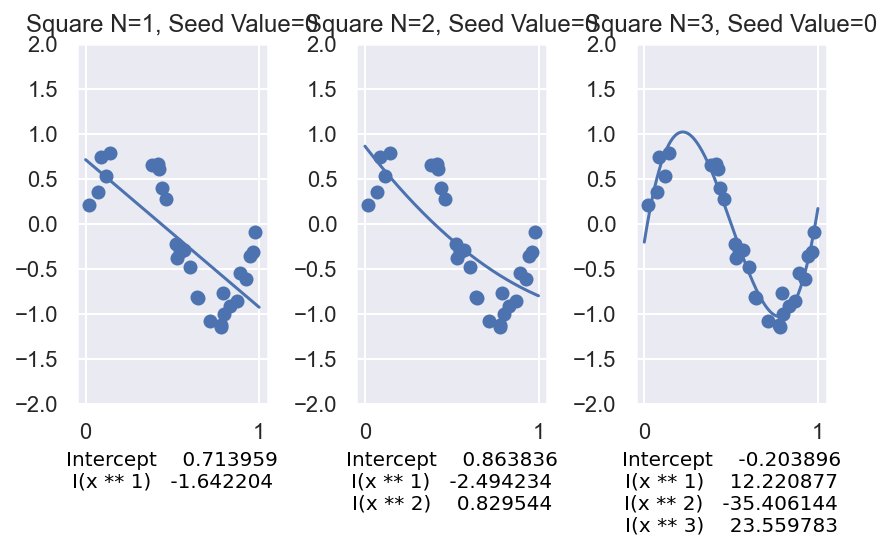

In [123]:
ax1 = plt.subplot(131)
polyreg(1, ax=ax1)
ax2 = plt.subplot(132)
polyreg(2, ax=ax2)
ax3 = plt.subplot(133)
polyreg(3, ax=ax3)
plt.tight_layout()
plt.show()

### 과최적화

차수를 계속 더 늘려보면? <br>
Overfitting이 일어날 수 있다.<br>

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
* 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나 
* 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다(다중공선성).

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다. 

과최적화가 문제가 되는 이유는 다음과 같다.

* 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)
* 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라진다. (추정의 부정확함)


다음 그림에서 과최적화가 발생하면 주어진 데이터가 아닌 다른 새로운 x 데이터가 들어올 때 오차가 커지는 것을 볼 수 있다.

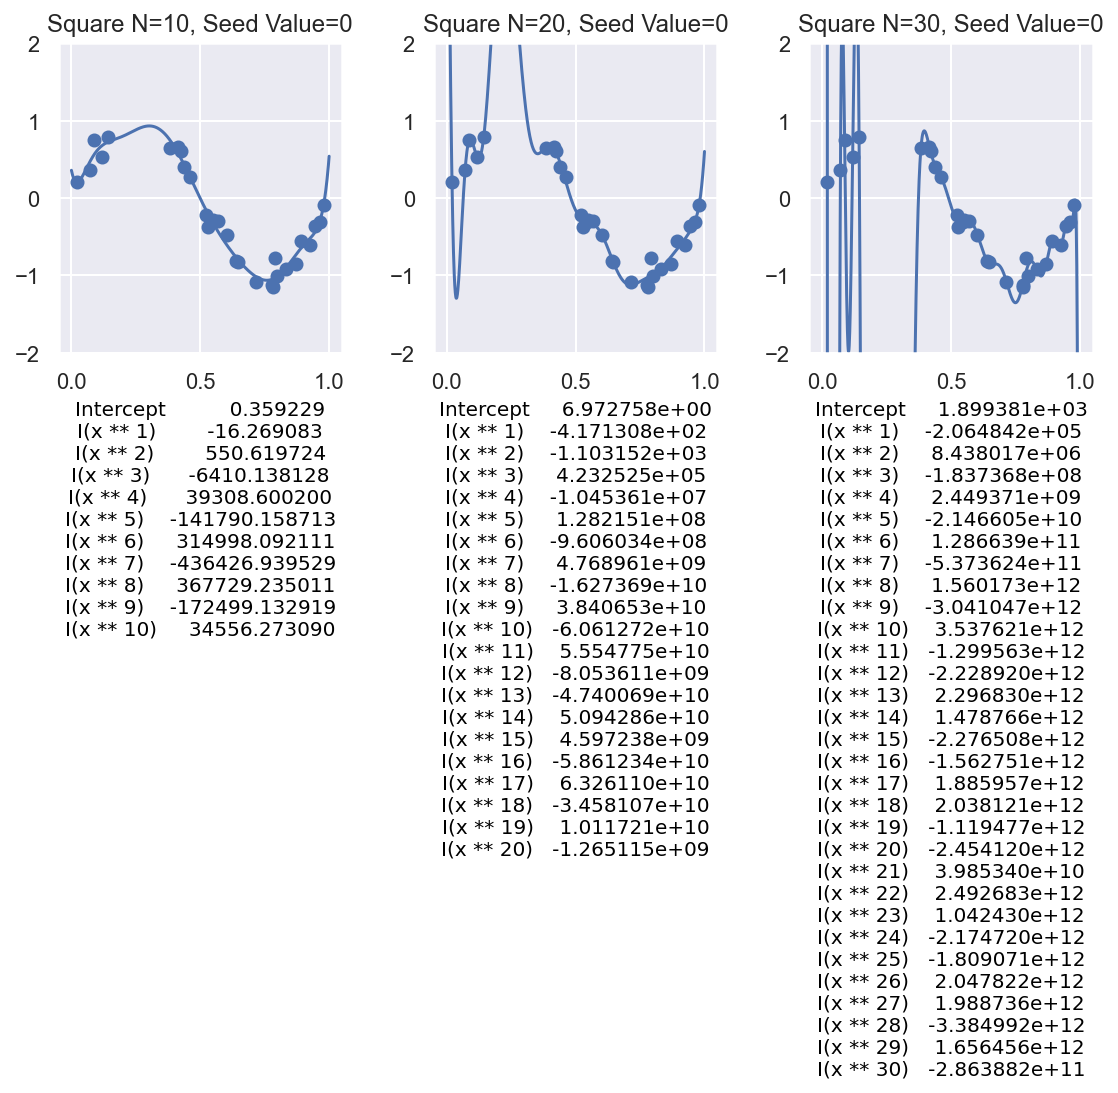

In [124]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, ax=ax2)
ax3 = plt.subplot(133)
polyreg(30, ax=ax3)
plt.tight_layout()
plt.show()

실선이 예측치도, 점이 실제 데이터야. <br>
1. 지금 정확도만 놓고 보면, 실선이 점을 뚫고 지나간다는거는 완전 정확하게 예측하는 거야. <br>
근데 예를 들어서, 지금 저 학습 데이터 중에 없는 난데없는 자리에서 실제 데이터가 있을 수 있지. <br>
x=0.3이 왔으면, y가 원래는 0.5~1이 나와야 되는데, 갑자기 1억이 나오고 그래버림. <br>
<br>



2. 또한 데이터가 조금만 달라져도 가중치 값이 크게 달라지는 것도 확인할 수 있다. 
    - 계수값이 무슨 데이터 조금 바뀌었다고, 하나는 마이너스 천억이 나오고, 하나는 + 백억이 나오네. 
    - 이 추정을 대체 어떻게 믿어

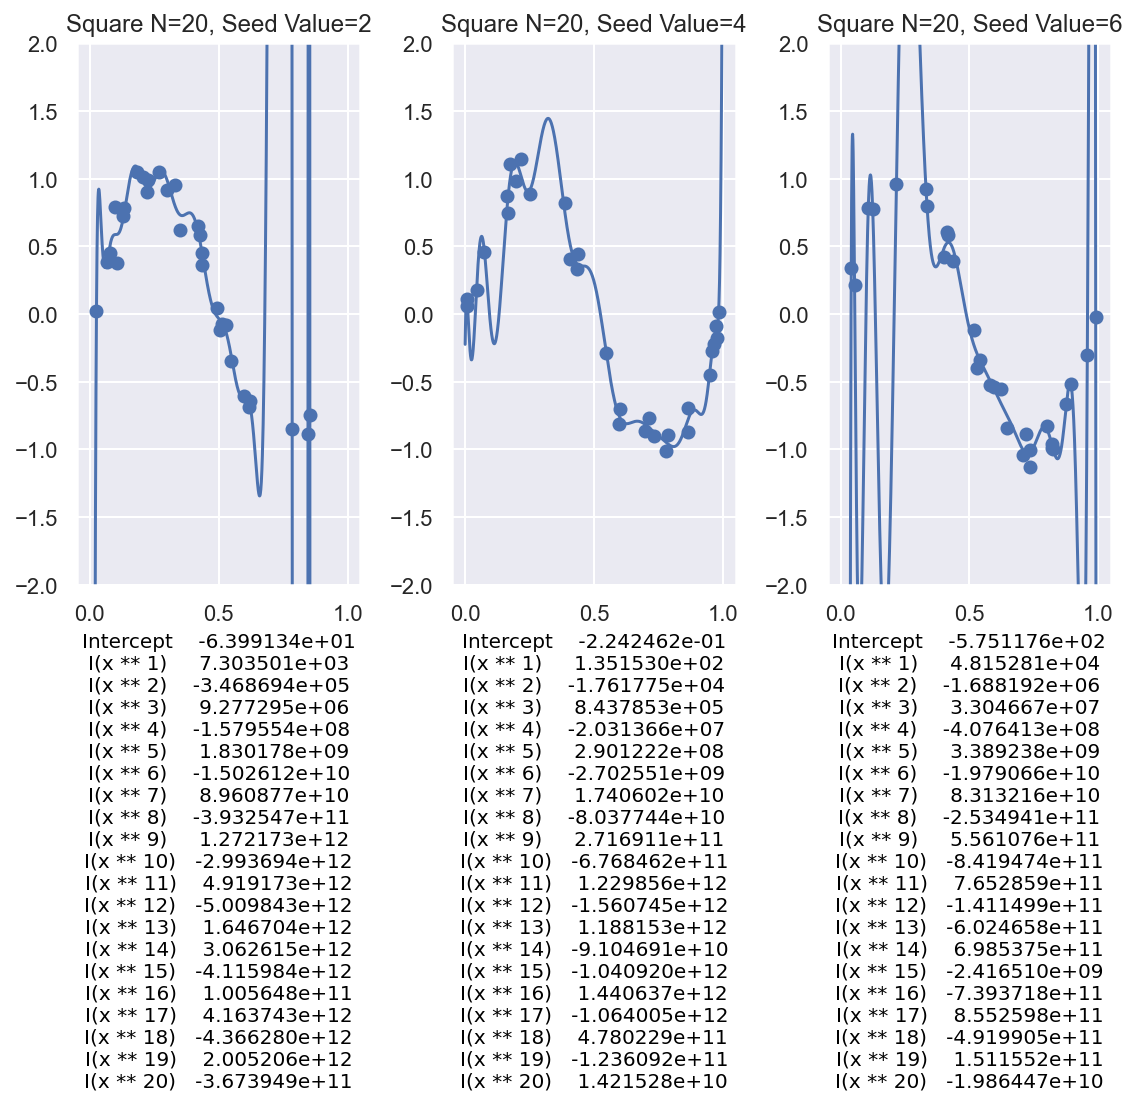

In [125]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()

***그럼 이제 우리가 알아야 할것은 두가지야.***
<h3>1. 과최적화가 발생했는지, 발생하지 않았는지를 어떻게 아는가. </h3>
<h3>2. 과최적화를 어떻게 막을 수 있는가? </h3>

<br>
<br>

## 6.3 교차검증

과최적화가 발생했는지, 안했는지를 체크하는 방법. <br>
학습용 데이터가 얼마나 잘 맞는지를 `in-sample performance`라고 말한다. 내가 가진 데이터로 훈련시키고, 그 데이터로 성능이 얼마나 나왔는가<br>
학습용 데이터가 아닌 새로운 데이터로 성능이 얼마나 잘 맞는가를 `out-of-sample performance`라고 부른다. 

항상 성능을 알아볼때는, out-of-sample performance를 체크해야한다. <br>
과최적화가 안되있으면, 보통은 표본 내 성능과 표본 외 성능이 비슷해야한다. <br>
과최적화가 되있으면, 표본 내 성능은 좋은데, 표본 외 성능이 확떨어진다. 

### 표본내 성능과 표본외 성능

회귀분석 모형을 만들기 위해서는 모수 추정 즉 학습(training)을 위한 데이터 집합이 필요하다. 이 데이터 집합을 학습용 데이터 집합(traning data set)이라고 한다. 이 학습 데이터 집합의 종속 변수값을 얼마나 잘 예측하였는지를 나타내는 성능을 **표본내 성능 검증(in-sample testing)**이라고 한다.

그런데 회귀분석 모형을 만드는 목적 중 하나는 종속 변수의 값을 아직 알지 못하고 따라서 학습에 사용하지 않은 표본의 대해 종속 변수의 값을 알아내고자 하는 것 즉 예측(prediction)이다. 이렇게 학습에 쓰이지 않는 표본 데이터 집합의 종속 변수 값을 얼마나 잘 예측하는가를 검사하는 것을 **표본외 성능 검증(out-of-sample testing)** 혹은 **교차검증(cross validation)**이라고 한다.

### 과최적화

일반적으로 표본내 성능과 표본외 성능은 비슷한 수준을 보이지만 경우에 따라서는 표본내 성능은 좋으면서 표본외 성능이 상대적으로 많이 떨어지는 수도 있다. 이러한 경우를 **과최적화(overfitting)**라고 한다. 과최적화가 발생하면 학습에 쓰였던 표본 데이터에 대해서는 잘 종속 변수의 값을 잘 추정하지만 새로운 데이터를 주었을 때 전혀 예측하지 못하기 때문에 예측 목적으로는 쓸모없는 모형이 된다.

이러한 과최적화가 발생하는 원인과 과최적화를 방지하기 위한 정규화(regularization) 방법에 대해서는 다음 절에서 다룬다. 여기에서는 과최적화가 발생한 것을 탐지하기 위한 교차검증 방법을 공부한다.

### 검증용 데이터 집합

데이터 처음에 받으면 2개로 쪼개야함. 

교차검증을 하려면 두 종류의 데이터 집합이 필요하다. 

* 모형 추정 즉 학습을 위한 데이터 집합 (training data set)
* 성능 검증을 위한 데이터 집합 (test data set)

두 데이터 집합 모두 종속 변수값이 있어야 한다. 따라서 보통은 가지고 있는 데이터 집합을 학습용과 검증용으로 나누어 학습용 데이터만을 사용하여 회귀분석 모형을 만들고 검증용 데이터로 성능을 계산하는 **학습/검증 데이터 분리(train-test split)** 방법을 사용한다.

### statsmodels 패키지에서의 교차검증

소수의 입력 변수와 소규모 데이터를 사용하는 전통적인 회귀분석에서는 다항회귀 등의 방법으로 모형 차수를 증가시키지 않는 한 과최적화가 생기는 경우가 드물다. 따라서 statsmodels 패키지에는 교차검증을 위한 기능이 별도로 준비되어 있지 않고 사용자가 직접 코드를 작성해야 한다.

다음은 보스턴 집값 데이터를 학습용과 검증용으로 나누어 교차검증을 하는 코드이다. 우선 무작위로 70%의 데이터를 골라서 학습용 데이터로 하고 나머지를 검증용 데이터로 한다.

In [80]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

N = len(df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]

학습용 데이터로 회귀모형을 만들면 결정 계수는 0.757이다.

In [81]:
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     81.31
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           7.22e-96
Time:                        17:33:59   Log-Likelihood:                -1057.6
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     340   BIC:                             2197.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6105      6.807      5.966      0.0

남겨둔 검증용 데이터로 성능을 구하면 결정계수는 0.688이다.

이거 테스트 한다고 다시 학습시키면 안되지. <br>
R-square구한 공식을 다시 써야해. 

In [82]:
pred = result.predict(df_test)

rss = ((df_test.MEDV - pred) ** 2).sum()
tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.688373412498711

이정도 수치 차이면, 보통 과최적화라고까지는 말 안한다.

### scikit-learn의 교차검증 기능

독립 변수의 개수가 많은 빅데이터에서는 과최적화가 쉽게 발생한다. 따라서 scikit-learn 의 model_selection 서브 패키지는 교차검증을 위한 다양한 명령을 제공한다.

### 단순 데이터 분리

`train_test_split` 명령은 데이터를 학습용 데이터와 검증용 데이터로 분리한다. 사용법은 다음과 같다.


```
train_test_split(data, data2, test_size, train_size, random_state)
```

* `data`: 독립 변수 데이터 배열 또는 pandas 데이터프레임
* `data2`: 종속 변수 데이터. `data` 인수에 종속 변수 데이터가 같이 있으면 생략할 수 있다.
* `test_size`: 검증용 데이터 개수. 1보다 작은 실수이면 비율을 나타낸다.
* `train_size`: 학습용 데이터의 개수. 1보다 작은 실수이면 비율을 나타낸다. `test_size`와 `train_size` 중 하나만 있어도 된다.
* `random_state`: 난수 시드


In [83]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((354, 14), (152, 14))

In [84]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.3, random_state=0)
dfX_train.shape, dfy_train.shape, dfX_test.shape, dfy_test.shape

((354, 13), (354, 1), (152, 13), (152, 1))

### K-폴드 교차검증

안 그래도 적은 데이터를 또 쪼개서 테스트 하잖아. <br>
이건 또 믿을 수 있나? <br>
테스트를 여러번 해봐야지. <br>

데이터의 수가 적은 경우에는 이 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 그렇다고 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않는다. 이러한 딜레마를 해결하기 위한 검증 방법이 **K-폴드(K-fold)** 교차검증 방법이다.

K-폴드 교차검증에서는 다음처럼 학습과 검증을 반복한다.

1. 전체 데이터를 K개의 부분 집합($\{D_1, D_2,\cdots, D_K\}$)으로 나눈다.
2. 데이터 $\{D_1, D_2, \cdots, D_{K-1} \}$를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 $\{D_K\}$로 교차검증을 한다.
3. 데이터 $\{D_1, D_2, \cdots, D_{K-2}, D_K \}$를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 $\{D_{K-1}\}$로 교차검증을 한다.
<br>$\vdots$
4. 데이터 $\{D_2, \cdots, D_K \}$를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 $\{D_1\}$로 교차검증을 한다.

이렇게 하면 총 K개의 모형과 K개의 교차검증 성능이 나온다. 이 K개의 교차검증 성능을 평균하여 최종 교차검증 성능을 계산한다.


![K-fold](./materials/1_22.png)

scikit-learn 패키지의 model_selection 서브 패키지는 `KFold` 클래스를 비롯한 다양한 교차검증 생성기를 제공한다. 이 생성기의 `split` 메서드는 
학습용과 검증용의 데이터 인덱스를 출력하는 파이썬 반복자(iterator)를 반환한다.

In [85]:
from sklearn.model_selection import KFold

scores = np.zeros(5)

# 5조각으로 만든다. shuffle=True를 안하면, 앞에서 부터 그냥 끊어서 5조각. 
cv = KFold(5, shuffle=True, random_state=0)

# split 명령어는 데이터 인덱스를 만든다.
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.MEDV - pred) ** 2).sum()
    tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.77301356, 검증 R2 = 0.58922238
학습 R2 = 0.72917058, 검증 R2 = 0.77799144
학습 R2 = 0.74897081, 검증 R2 = 0.66791979
학습 R2 = 0.75658611, 검증 R2 = 0.66801630
학습 R2 = 0.70497483, 검증 R2 = 0.83953317


대부분은, test data가 약간은 낮게 나오는게 보통이긴은 해. 반드시 그런 것은 아니지만. 

**이게 지금 오해하면 안되는게, 실제 모델은 Data 가진 것 다 써서 만드는 거야. <br>
그런데, 그 모델의 성능을 검사할때, 이렇게 한다는 것.**

### 평가 점수

scikit-learn의 metrics 서브패키지에는 예측 성능을 평가하기 위한 다양한 함수를 제공한다. 그 중 회귀분석에 유용한 함수를 소개한다.

* `r2_score`: 결정 계수
* `mean_squared_error`: 평균 제곱 오차(mean squared error)
* `median_absolute_error`: 절대 오차 중앙값(median absolute error)

이 함수를 이용하여 위 코드를 다음처럼 간단하게 고칠 수 있다.

In [87]:
from sklearn.metrics import r2_score

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rsquared = r2_score(df_test.MEDV, pred)
    
    scores[i] = rsquared

scores

array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])

### 교차검증 반복

위와 같이 교차검증을 반복하는 코드를 더 간단하게 만들어주는 함수가 있다. 바로 `cross_val_score`이다. 사용법은 다음과 같다.

```
cross_val_score(model, X, y, scoring=None, cv=None)
```

* `model` : 회귀 분석 모형
* `X` : 독립 변수 데이터
* `y` : 종속 변수 데이터
* `scoring` : 성능 검증에 사용할 함수 이름
* `cv` : 교차검증 생성기 객체 또는 숫자.
   * `None`이면 `KFold(3)`
   * 숫자 `k`이면 `KFold(k)`


단 `cross_val_score` 명령은 scikit-learn에서 제공하는 모형만 사용할 수 있다. statsmodels의 모형 객체를 사용하려면 다음과 같이 scikit-learn의 `RegressorMixin`으로 래퍼 클래스(wrapper class)를 만들어주어야 한다.

아래꺼 복사해서 쓰면 된다.

In [89]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

이 래퍼 클래스와 cross_val_score 명령을 사용하면 교차검증 성능 값을 다음처럼 간단하게 계산할 수 있다.

In [90]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("MEDV ~ " + "+".join(boston.feature_names))
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv)

array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])

R square값을 자동으로 뱉어주네. 

애초에 cross-validation이라는게, 이거를 통해서 하이퍼파라미터 튜닝하고 모델 만들때 여러 값들을 정하고 어떻게 훈련시킬지를 정하는 것. <br>
그 후에, 정해지면 전체 데이터 넣어서 모델 만드는 것. <br>
하이퍼파라미터 튜닝/모델 만드는 과정에서 그냥 이것만 쓰면 된다. 

### 벤치마크 검증 데이터

캐글 같은 것을 나가면, training set은 x/y가 둘다 있는데, test set은 보통 x만 있다. <br>
training set으로 모델 만들어서, 그 모델에 테스트용 x 넣어서 제출하는 것.  <br>
그럼 캐글에서 내부적으로 채점해서 총점으로 알려준다. 

그럼 여기서는, X train 자체를 가지고 또 쪼개서, cros-val하면서, 모델 만들어야 한다.

유명한 벤치마크 문제(benchmark problem)나 캐글(Kaggle)과 같은 데이터 분석 경진대회(competition)에서는 최종 성능검증을 위한 검증 데이터가 별도로 제공될 수도 있다. 이렇게 하는 이유는 어떤 K-폴드 등의 방법으로 생성된 검증 데이터가 달라지면 성능도 약간씩 달라질 수 있기 때문에 순위 결정을 위해 어쩔 수 없이 하나의 최종 검증 데이터를 못박아 놓은 것이다. 따라서 이렇게 유일한 검증 데이터에 대한 성능은 엄격한 의미에서 절대적인 것이라고 볼 수 없다. 이러한 경우에도 학습용 데이터를 K-폴드 등의 방법으로 나누어 교차검증을 실시함으로써 과최적화를 막을 수 있다.

이러한 벤치마크 문제에서 최종 검증 데이터를 학습에 사용하는 것은 일종의 반칙(cheating)이므로 절대로 최종 검증 데이터를 학습에 사용해서는 안된다. 캐글과 같은 경진대회에서는 최종 검증 데이터에 대한 종속변수 값은 공개하지 않고 독립변수 값만 공개함으로써 최종 검증 데이터를 학습에 사용하는 것을 막는다.